####        ##                                    פרויקט גמר חיזוי בקרנות נאמנות בישראל 
אביב יפת אודיה רחמים וחנן ג'קובס


נקרא לספריות הנחוצות לצורך המשימה

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

נקרא את 12 הדוחות החודשיים שמכילים מידע בעבור כל 2300 הקרנות ברמה חודשית

In [5]:
Data1=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_012019.csv',encoding='UTF-8')
Data2=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_022019.csv',encoding='UTF-8')
Data3=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_032019.csv',encoding='UTF-8')
Data4=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_042019.csv',encoding='UTF-8')
Data5=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_052019.csv',encoding='UTF-8')
Data6=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_062019.csv',encoding='UTF-8')
Data7=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_072019.csv',encoding='UTF-8')
Data8=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_082019.csv',encoding='UTF-8')
Data9=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_092019.csv',encoding='UTF-8')
Data10=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_102019.csv',encoding='UTF-8')
Data11=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_112019.csv',encoding='UTF-8')
Data12=pd.read_csv('C:\\Users\\user\\Desktop\פרויקט גמר\\קבצים\\ק203\\hodshi_122019.csv',encoding='UTF-8')

In [6]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [59]:
#data_fund=pd.read_csv('C:\\Users\\chana\\Desktop\\ProjectData\\Funds_Type1.csv',encoding='UTF-8')
#data_fund=data_fund[['Fund_Number','Fund_Type']]
#data_fund

כעת נאחד את 12 הקבצים לקובץ אחד

In [11]:
Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12], axis=0)
dict = {'MISPAR MENAHE':'Mannager_Number',
        'MISPAR KEREN':'Fund_Number',
        'SHEM KEREN':'Fund_Name',
        'PTUCHA/SGURA':'Fund_Type',
        'SHEM NECHES':'Asset_name',
        'MISPAR NIYAR':'Security_Num',
        'MISPAR MEZAHE':'Identity_Num',
        'SUG MISPAR MEZAHE':'Identity_Num_Type',
        'TEUR SUG MISPAR MEZAHE':'Identity_Num_Type_Describe',    
        'KAMUT':'Amount',
        'SHOVI':'Value',
        'MECHIR':'Price',
        'SHOVI MATBEA':'Currency_Value',
        'ACHUZ MIKEREN':'Precent_From_Fund',
        'KAMUT HASHALA':'lending_Ammount',
        'SUG MECHIR':'Price_Type',
        'MAKOM MISCHAR':'Country_of_trade',
        'SHUK MISCHAR':'Trading_Market', 
        'MATBEA':'Currency',
        'SHAAR MATBEA':'Currency_Rate',
        'KAMUT LEPIDION':'Redemption_Amount',
        'RIBIT ZVURA':'Accumalted_Intrest',
        'TICKER':'TICKER',
        'HITCHAYVUT':'Commitment',
        'DARGAT AGACH':'Degree_of_Bond',
        'KOD CHEVRA MEDAREGET':'Tiering_company_code',
        'KOD BANK':'Bank_code',
        'TAARICH DIVUCAH':'Report_Date',
        'MISPAR RESHUMA BATOFES':'Num_of_record_in_form',
        'MISPAR RESHUMUT':'Num_of_records',
        'MISPAR ASMACHTA':'Num_of_reference'}
Data.rename(columns=dict,inplace=True)
#Data=pd.merge(Data,data_fund,on =['Fund_Number'],how ="left")
#Data = swap_columns(Data, 'Fund_Type_x' , 'Fund_Type_y')
#Data=Data.drop('Fund_Type_x',axis=1)
#Data.rename(columns={'Fund_Type_y':'Fund_Type'}, inplace=True)
Data["Report_Date"] = pd.to_datetime(Data["Report_Date"])

list_data=[Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]
for curr_data in list_data:
    curr_data.rename(columns=dict,inplace=True)  
    curr_data["Report_Date"] = pd.to_datetime(curr_data["Report_Date"])

In [12]:
Data.head()

,Mannager_Number,Fund_Number,Fund_Name,Fund_Type,Asset_name,Security_Num,Identity_Num,Identity_Num_Type,Identity_Num_Type_Describe,Amount,...,Accumalted_Intrest,TICKER,Commitment,Degree_of_Bond,Tiering_company_code,Bank_code,Report_Date,Num_of_record_in_form,Num_of_records,Num_of_reference
0,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,טיב טעם הולדינגס 0.25שח ...,103010,1,1,"מס' בורסה ת""א",32945.0,...,0.0,TTAM,1,,0,31,2019-01-31,1,4717,2019-03-014685
1,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,ביטפארמס טכנו מר 0.01שח ...,1080241,1,1,"מס' בורסה ת""א",3243.0,...,0.0,BLLCF,1,,0,31,2019-01-31,2,4717,2019-03-014685
2,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,המלט 1 ...,1080324,1,1,"מס' בורסה ת""א",427.0,...,0.0,HAML,1,,0,31,2019-01-31,3,4717,2019-03-014685
3,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,רימוני מר 1 ...,1080456,1,1,"מס' בורסה ת""א",1059.0,...,0.0,RIMO,1,,0,31,2019-01-31,4,4717,2019-03-014685
4,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,אנליסט מ''ר 1 ...,1080613,1,1,"מס' בורסה ת""א",637.0,...,0.0,ANLT,1,,0,31,2019-01-31,5,4717,2019-03-014685


נייבא קובץ אודות תשואה שנתית ממוצעת

In [14]:
Raw_year_Yield_data=pd.read_csv('C:\\Users\\user\\Desktop\\פרויקט גמר\\קבצים\\תשואה שנתית\\year_yield.csv',encoding='UTF-8')
#clean data:
Raw_year_Yield_data=Raw_year_Yield_data[8:]
Raw_year_Yield_data.columns= Raw_year_Yield_data.iloc[0]
Raw_year_Yield_data=Raw_year_Yield_data[1:]
year_yield=Raw_year_Yield_data[["מס' קרן בבורסה", 'תשואה שקלית של הקרן']]
year_yield = year_yield.reset_index(drop = True)    
year_yield=year_yield[:2127]
dict = {"מס' קרן בבורסה":'Fund_Number','תשואה שקלית של הקרן':'Yield'}
year_yield.rename(columns=dict,inplace=True)
year_yield['Yield']=year_yield['Yield'].astype(float)
year_yield['Fund_Number']=year_yield['Fund_Number'].astype(int)
year_yield

8,Fund_Number,Yield
0,5119904,8.46
1,5125232,12.28
2,5125224,41.07
3,5125240,30.98
4,5112628,21.19
...,...,...
2122,5128814,-0.08
2123,5128426,21.14
2124,5130034,-0.75
2125,5123393,9.63


#### אפיון הדאטה:

#### סוגי הקרנות אצלנו בדאטה:

In [15]:
Data.dropna(subset=['Fund_Type'])['Fund_Type'].unique()

array(['פתוחה רגילה', 'קרן סל - קרן סגורה', 'קרן מחקה - קרן פתוחה',
       'קרן טכנולוגיה עילית - קרן סגורה'], dtype=object)

#### פיצ'רים בדאטה

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311487 entries, 0 to 291336
Data columns (total 31 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Mannager_Number             int64         
 1   Fund_Number                 int64         
 2   Fund_Name                   object        
 3   Fund_Type                   object        
 4   Asset_name                  object        
 5   Security_Num                object        
 6   Identity_Num                int64         
 7   Identity_Num_Type           int64         
 8   Identity_Num_Type_Describe  object        
 9   Amount                      float64       
 10  Value                       int64         
 11  Price                       float64       
 12  Currency_Value              float64       
 13  Precent_From_Fund           float64       
 14  lending_Ammount             object        
 15  Price_Type                  int64         
 16  Country_of_trade   

#### גודל הדאטה 

In [17]:
Data.shape

(3311487, 31)

#### נציג מספר קרנות כולל לאורך השנה

,number_of_funds
month,
2019-01-01,2084
2019-02-01,2079
2019-03-01,2077
2019-04-01,2075
2019-05-01,2088
2019-06-01,2089
2019-07-01,2101
2019-08-01,2098
2019-09-01,2099


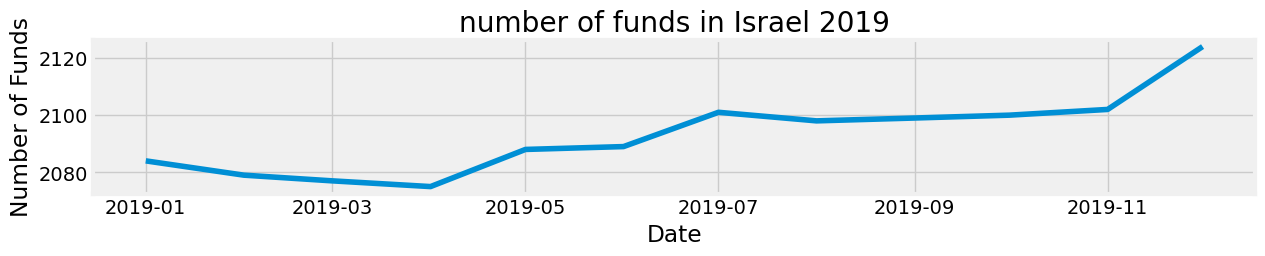

In [25]:
list_data=[Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]
num_of_funds=[]
type_name=[]
months=['1/2019','2/2019','3/2019','4/2019','5/2019','6/2019','7/2019','8/2019','9/2019','10/2019','11/2019','12/2019']
count=0

for data_set in list_data:
    #count how many of each type we have
    #data_set=pd.merge(data_set,data_fund,on =['Fund_Number'],how ="left")
    #data_set = swap_columns(data_set, 'Fund_Type_x' , 'Fund_Type_y')
    #data_set=data_set.drop('Fund_Type_x',axis=1)
    #data_set.rename(columns={'Fund_Type_y':'Fund_Type'}, inplace=True)
    data_set=data_set[data_set['Fund_Type']!='`']
    month_types=(data_set[['Fund_Number','Fund_Type']].drop_duplicates())
    month_types=month_types.groupby(['Fund_Type'])['Fund_Number'].count().reset_index(name='count funds')
    month_types=month_types.values.tolist()
    curr_Month=months[count]
    month_types[0].append(curr_Month)
    type_name.append(month_types[0])    
    month_types[1].append(curr_Month)
    type_name.append(month_types[1])
    month_types[2].append(curr_Month)
    type_name.append(month_types[2])
    month_types[3].append(curr_Month)
    type_name.append(month_types[3])
    count+=1
    #count toatal number of funds thruought months in 2019:
    num=data_set["Fund_Number"].unique().size
    num_of_funds.append(num)
#df דאטה פריים עם מספר קרנות בכל חודש
df=[]
df.append(months)
df.append(num_of_funds)
df = pd.DataFrame(df).transpose()
df.columns=['month', 'number_of_funds']

#נהפוך את שני הוקטורים לדאטה פריים:
df=df.set_index('month')
df.index = pd.to_datetime(df.index)

type_name = pd.DataFrame(type_name, columns = ['type', 'Number','month'])
type_name = swap_columns(type_name, 'month' , 'type')
type_name=swap_columns(type_name, 'Number' , 'type')
type_name=type_name.set_index('month')

# נצייר את הגרף:
plt.figure(figsize=(15, 2))
plt.style.use("fivethirtyeight")
plt.xlabel("Date")
plt.ylabel("Number of Funds")
plt.title("number of funds in Israel 2019")
plt.plot(df)
df

#### נציג מספר קרנות מכל סוג לאורך השנה:

            Open_index  open_regular  closed  technologhy_fund
month                                                         
2019-01-01         326          1147     554                 1
2019-02-01         330          1148     544                 1
2019-03-01         334          1146     540                 1
2019-04-01         337          1147     534                 1
2019-05-01         346          1150     535                 1
2019-06-01         348          1150     534                 1
2019-07-01         349          1158     537                 1
2019-08-01         365          1150     540                 1
2019-09-01         370          1154     532                 1
2019-10-01         370          1158     529                 1
2019-11-01         375          1157     527                 1
2019-12-01         384          1186     517                 1


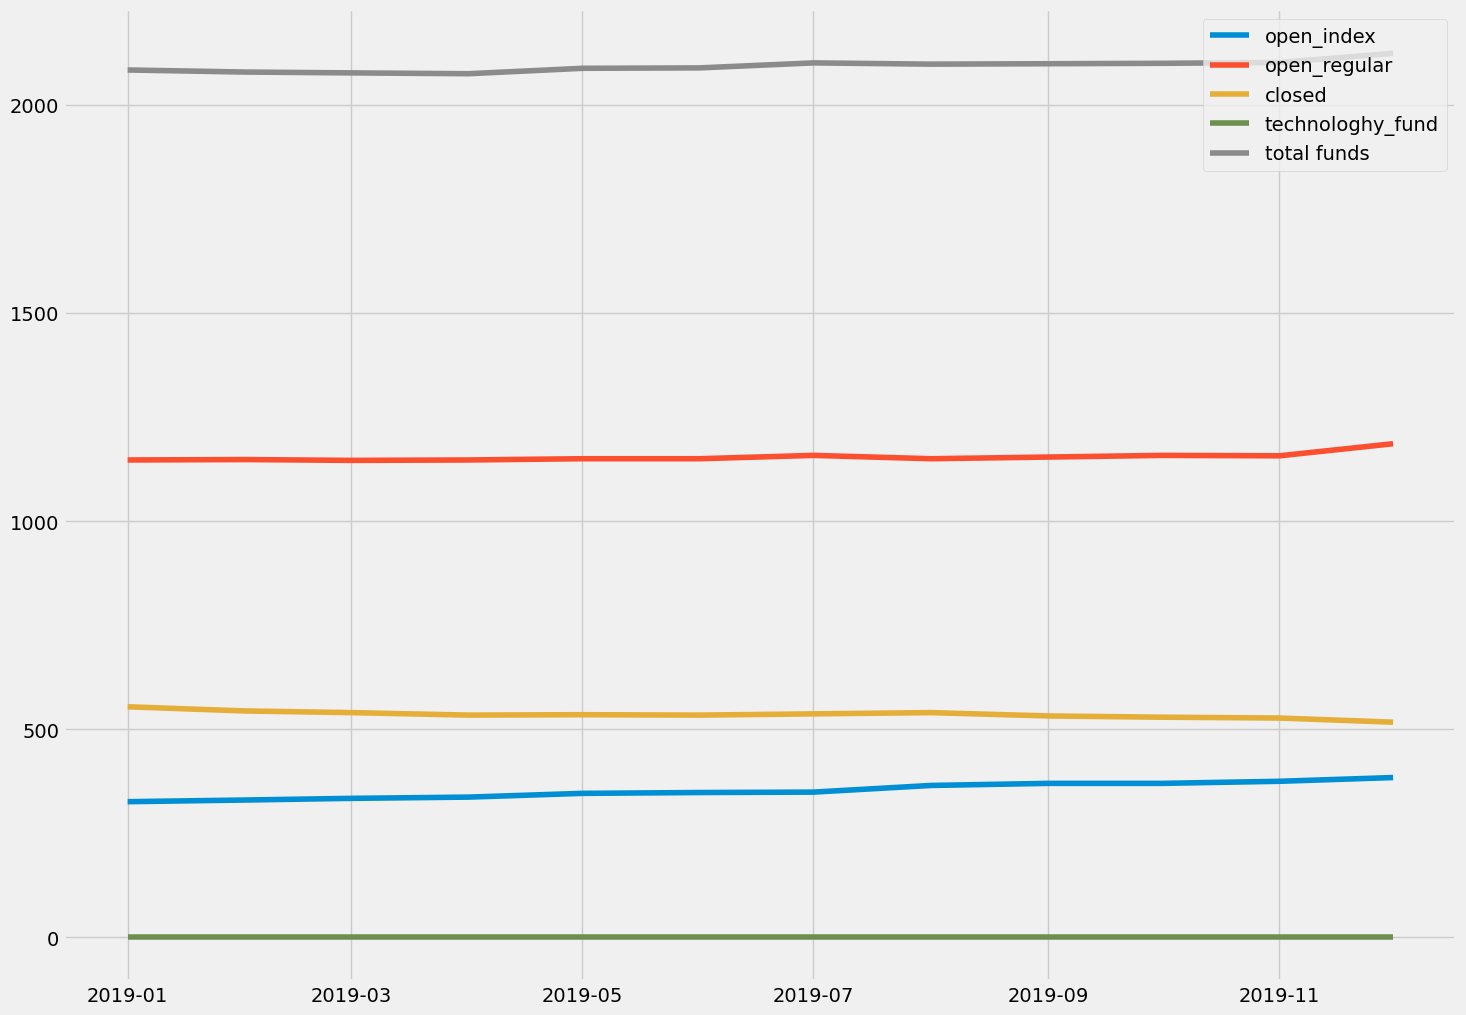

<Figure size 1000x700 with 0 Axes>

In [26]:
#type_name דאטה פריים שמציג מספר סוגי הקרנות לאורך החודשים :
#כל פעם בעמודת סוג הקרן נבחר בסוג שונה ונשים את כל הערכים שלו בעמודה אחת:

type_name.index = pd.to_datetime(type_name.index)
closed=type_name.loc[type_name['type']=='קרן סל - קרן סגורה']
open_regular=type_name.loc[type_name['type']=='פתוחה רגילה']
open_index=type_name.loc[type_name['type']=='קרן מחקה - קרן פתוחה']
technologhy_fund=type_name.loc[type_name['type']=='קרן טכנולוגיה עילית - קרן סגורה']

#נשנה כותרות של הדאטה פריים שיצרנו  
open_index.rename(columns={'Number':'Open_index'}, inplace=True)
open_regular.rename(columns={'Number':'open_regular'}, inplace=True)
closed.rename(columns={'Number':'closed'}, inplace=True)
technologhy_fund.rename(columns={'Number':'technologhy_fund'}, inplace=True)

#נמזג את סוגי הקרנות השונים לטבלה אחת שבה כל שורה מייצגת מספר קרנות מאותו הסוג:
list_types=[open_regular,closed,technologhy_fund]
types=open_index
types=types.drop('type',axis=1)
for i in range(len(list_types)):
    curr=list_types[i].drop('type',axis=1)
    types=pd.merge(types,curr,on =['month'],how ="left")

#כעת הדאטה פריים טייפס מכיל מספר הקרנות מכל סוג כעמודות:
#נצייר את זה בגרף:
print(types)
plt.figure(figsize=(16,12))
plt.plot(types,label=['open_index','open_regular','closed','technologhy_fund'])
plt.plot(df,label='total funds')
plt.legend()  
plt.show()
fig = plt.figure(figsize =(10, 7))

## נציג תיאור של נתוני:

                      1.          מספר נכסים (ממוצע לכל קרן)
                      2.          שווי נכסים ממוצע
                      3.          תשואה של קרן

In [28]:
df_00=Data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value','Fund_Type','Security_Num']]
groups=[300,301]
value=[300]
assets_00=[301]
df_01=df_00[df_00['Identity_Num'].isin(value)]
df_02=df_00[df_00['Identity_Num'].isin(assets_00)]
#תשואה לשנה
year_yield
#ממוצע שווי לשנה לקרן
average_fund_value=df_01.groupby(['Fund_Number'])['Value'].mean().reset_index(name='Average_Fund_value')
average_fund_value['Average_value_in_Millions']=average_fund_value.Average_Fund_value/1000000
average_fund_value=average_fund_value.drop('Average_Fund_value',axis=1)
#ממוצע נכסים לקרן לשנה
average_fund_assets=df_00.loc[(df_00['Identity_Num']<106)&(df_00['Identity_Num']!=103)&(df_00['Identity_Num']!=100)]
average_fund_assets=average_fund_assets.groupby(['Fund_Number','Report_Date','Fund_Type'])['Security_Num'].count().reset_index(name='unique_securities_in_fund')
average_fund_assets=average_fund_assets.groupby(['Fund_Number','Fund_Type'])['unique_securities_in_fund'].mean().reset_index(name='Average_assets')
#נמזג 
df_03=pd.merge(average_fund_value,average_fund_assets,on =['Fund_Number'],how ="left")
df_03=pd.merge(df_03,year_yield,on =['Fund_Number'],how ="left")
df_03= swap_columns(df_03,'Fund_Type' ,'Average_value_in_Millions')
df_03.describe().drop('Fund_Number',axis=1).round(2)

,Average_value_in_Millions,Average_assets,Yield
count,2275.00,2214.00,2124.00
mean,148.24,77.34,11.15
std,295.29,77.78,12.68
min,0.00,1.00,-100.00
25%,16.13,18.02,4.25
50%,51.35,51.88,8.36
75%,144.17,115.31,17.16
max,5134.58,498.08,114.75


#### נציג ממוצע נכסים לפי סוג קרן

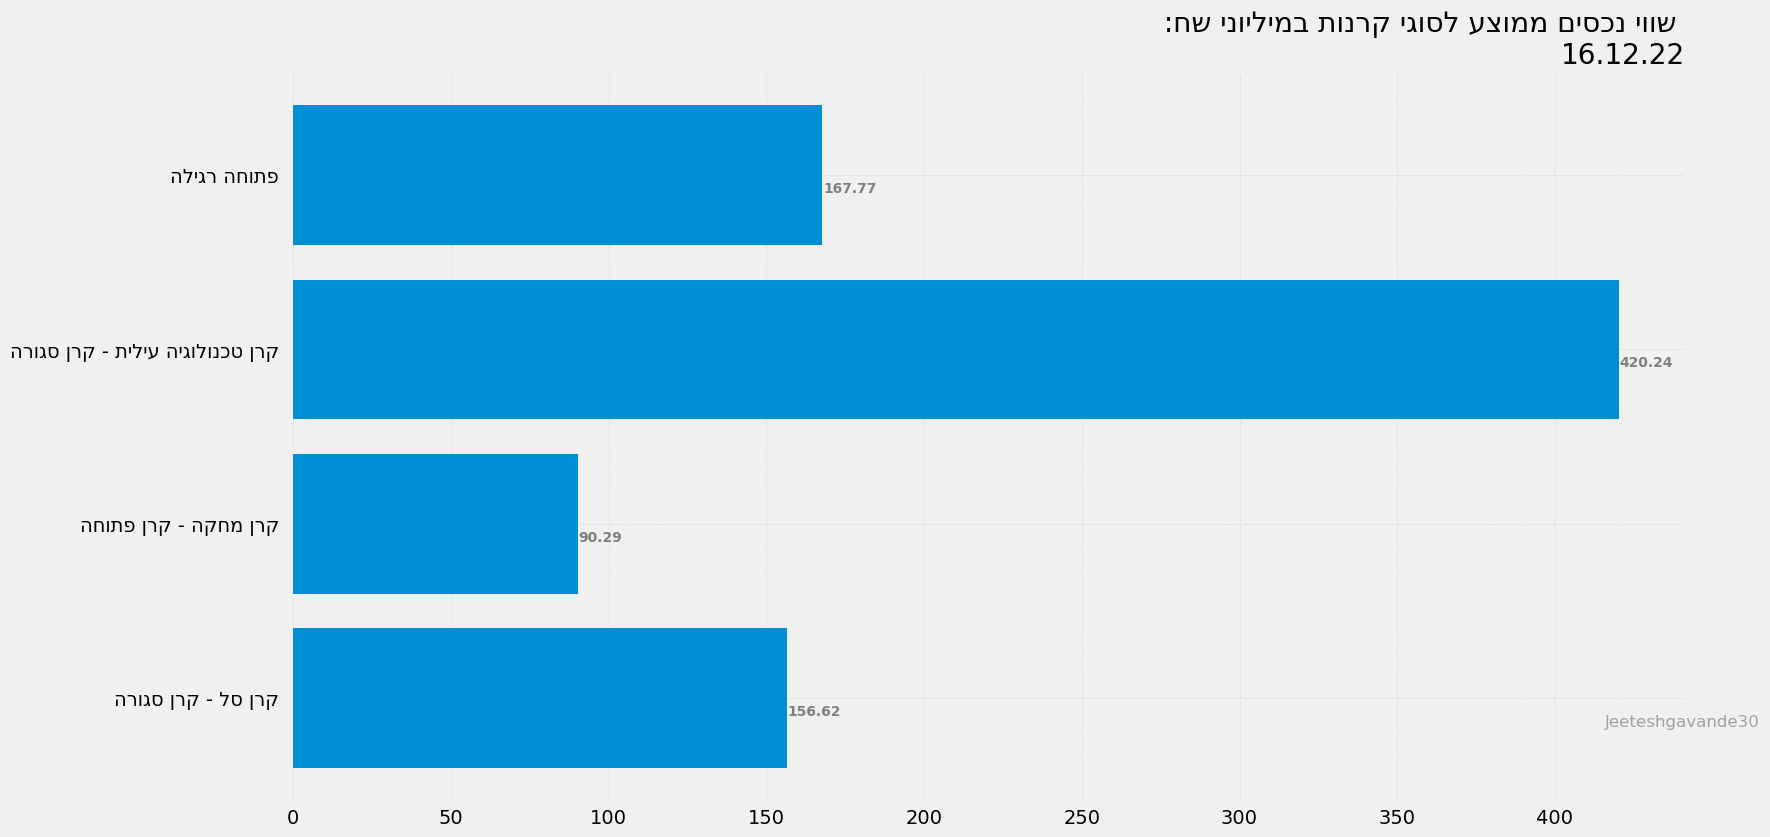

,Fund_Type,Average_value_in_Millions
0,פתוחה רגילה,167.769290
1,קרן טכנולוגיה עילית - קרן סגורה,420.238994
2,קרן מחקה - קרן פתוחה,90.293398
3,קרן סל - קרן סגורה,156.618204


In [29]:
#ממוצע שוי נכסים בסוגי קרנות דומים 
Average_value_in_Millions_pie=df_03.groupby(['Fund_Type'])['Average_value_in_Millions'].mean().reset_index(name='Average_value_in_Millions')
Average_value_in_Millions_pie

fig, ax = plt.subplots(figsize =(16, 9))
x=Average_value_in_Millions_pie['Fund_Type'].apply(lambda x: x[::-1])
y=Average_value_in_Millions_pie['Average_value_in_Millions']
ax.barh(x, y)
Header=" שווי נכסים ממוצע לסוגי קרנות במיליוני שח: "
Header=Header[::-1]

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title(Header+'\n'+"16.12.22",
             loc ='right', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='left', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()
Average_value_in_Millions_pie

#### שווי נכסים ממוצע בקבוצות השונות: 

<Figure size 1000x1000 with 0 Axes>

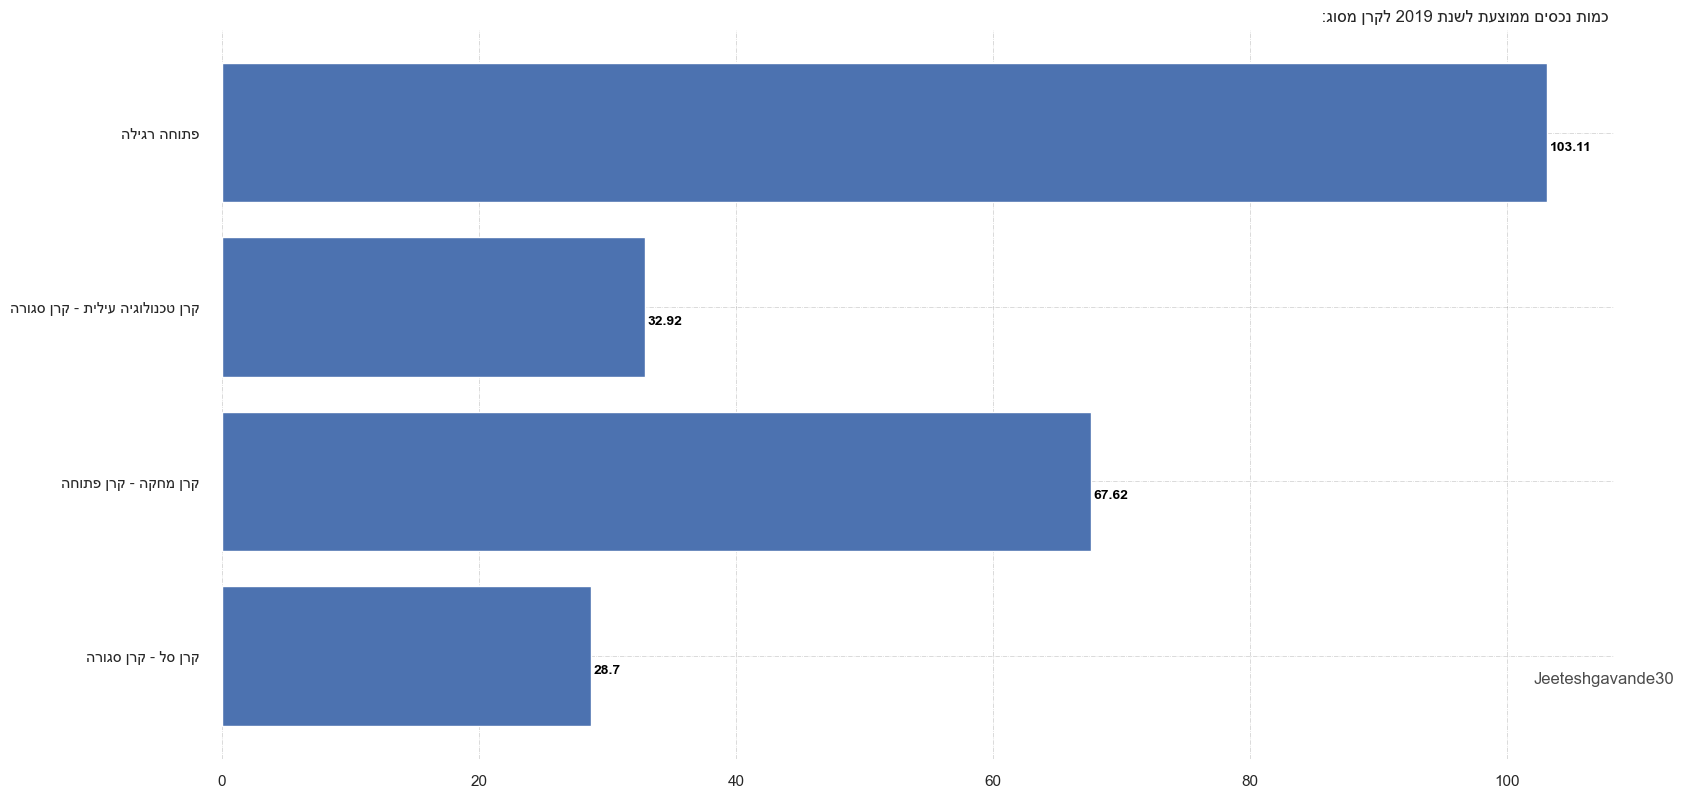

,Fund_Type,Average_value_in_Millions
0,פתוחה רגילה,167.769290
1,קרן טכנולוגיה עילית - קרן סגורה,420.238994
2,קרן מחקה - קרן פתוחה,90.293398
3,קרן סל - קרן סגורה,156.618204


In [30]:
#ממוצע כמות נכסים בסוגי קרנות דומים 
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

average_fund_assets_pie=average_fund_assets.groupby(['Fund_Type'])['Average_assets'].mean().reset_index(name='Average_assets')

x=average_fund_assets_pie['Fund_Type'].apply(lambda x: x[::-1])
y=average_fund_assets_pie['Average_assets']
average_fund_assets_pie
fig, ax = plt.subplots(figsize =(16, 9))
x=average_fund_assets_pie['Fund_Type'].apply(lambda x: x[::-1])
y=average_fund_assets_pie['Average_assets']
ax.barh(x, y)
Header=" כמות נכסים ממוצעת לשנת 9102 לקרן מסוג: "
Header=Header[::-1]
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis() 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title(Header,
             loc ='right', )
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='black', ha ='left', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()
Average_value_in_Millions_pie

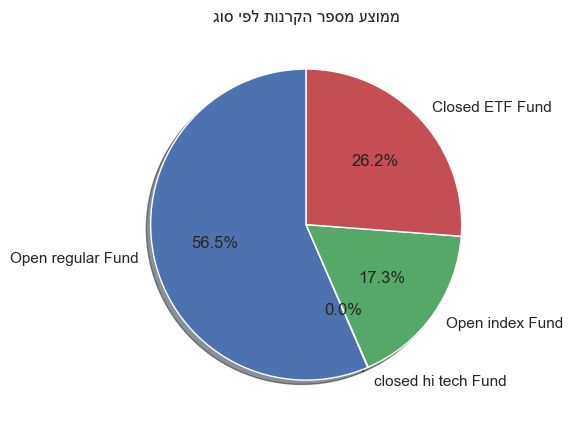

,type,average_of_type
0,פתוחה רגילה,1154.25
1,קרן טכנולוגיה עילית - קרן סגורה,1.00
2,קרן מחקה - קרן פתוחה,352.83
3,קרן סל - קרן סגורה,535.25


In [31]:
#ממוצע כמות  קרנות שנתי לפי סוג 
data_pie=type_name.groupby(['type'])['Number'].mean().reset_index(name='average_of_type')
plt.pie(data_pie['average_of_type'], labels = ['Open regular Fund','closed hi tech Fund','Open index Fund','Closed ETF Fund'],shadow = True,autopct='%1.1f%%',  startangle=90)
head='ממוצע מספר הקרנות לפי סוג'
head=head[::-1]
plt.title(head)
plt.show()
data_pie.round(2)

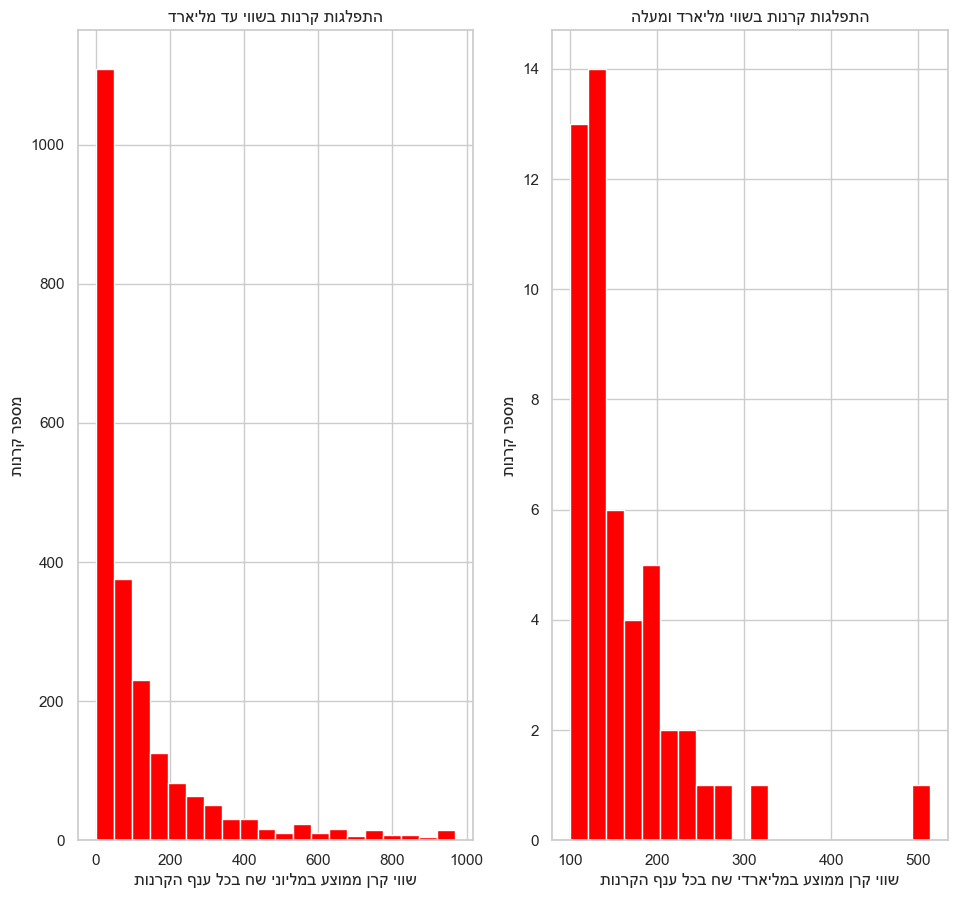

,Average_value_in_Millions
count,2275.00
mean,148.24
std,295.29
min,0.00
25%,16.13
50%,51.35
75%,144.17
max,5134.58


<Figure size 640x480 with 0 Axes>

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

#כותרות ציר איקס ציר וואי
xhead,yhead= 'שווי קרן ממוצע במליוני שח בכל ענף הקרנות' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

#נעמיד את 2 ההיסטוגרמות אחת על יד השניה
#התפלגות קרנות עד מליארד
plt.subplot(1, 2, 1)
for_hist0=df_03.loc[df_03['Average_value_in_Millions']<1000]
plt.hist(for_hist0['Average_value_in_Millions'],bins=20,color='red')
plt.xlabel(xhead)
plt.ylabel(yhead)
head='התפלגות קרנות בשווי עד מליארד'
head=head[::-1]
plt.title(head)

#התפלגות קרנות מליארד ומעלה
plt.subplot(1, 2, 2)


for_hist1=df_03.loc[df_03['Average_value_in_Millions']>1000]
plt.hist(for_hist1['Average_value_in_Millions']/10,bins=20,color='red')

xhead,yhead= 'שווי קרן ממוצע במליארדי שח בכל ענף הקרנות' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

head='התפלגות קרנות בשווי מליארד ומעלה'
head=head[::-1]
plt.title(head)
plt.show()
plt.tight_layout()
df_03[['Average_value_in_Millions']].describe().round(2)

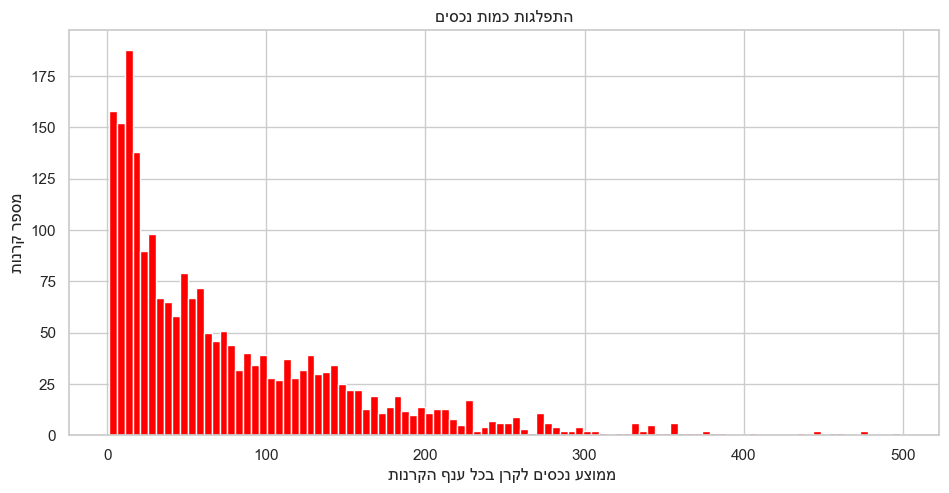

,Average_assets
count,2213.00
mean,77.31
std,77.79
min,1.00
25%,18.00
50%,51.83
75%,115.25
max,498.08


In [94]:
plt.figure(figsize=(10,5))
plt.hist(df_03['Average_assets'],bins=100,color='red')
xhead,yhead= ' ממוצע נכסים לקרן בכל ענף הקרנות' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

head='התפלגות כמות נכסים'
head=head[::-1]
plt.title(head)
plt.show()
df_03
df_03[['Average_assets']].describe().round(2)

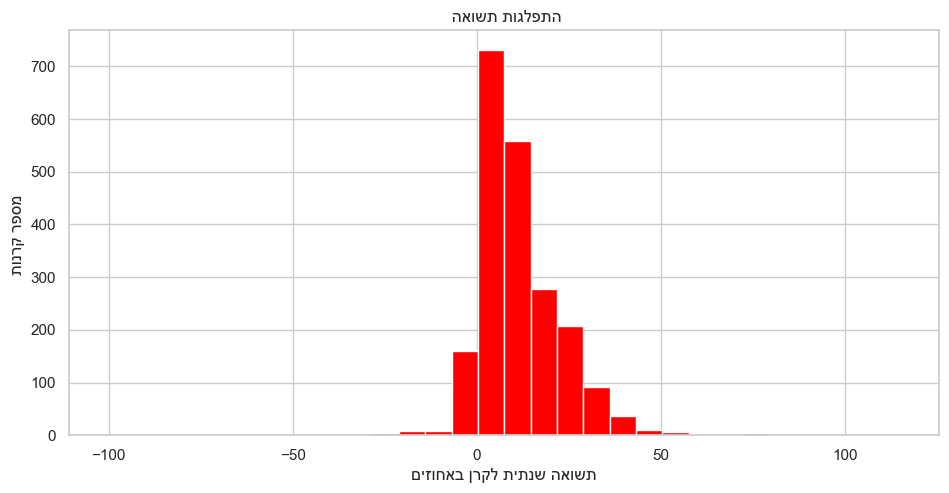

,Yield
count,2124.00
mean,11.15
std,12.68
min,-100.00
25%,4.25
50%,8.36
75%,17.16
max,114.75


In [33]:
head='התפלגות תשואה '
head=head[::-1]

plt.figure(figsize=(10,5))
plt.hist(df_03['Yield'],bins=30,linestyle='solid',color='red')
xhead="תשואה שנתית לקרן באחוזים"
yhead= " מספר קרנות"
xhead=xhead[::-1]
yhead=yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)
plt.show()
df_03[['Yield']].describe().round(2)

#### כעת נסנן לפי קרנות פתוחות רגילות ונראה את התפלגויות השונות:

#### קרנות פתוחות:

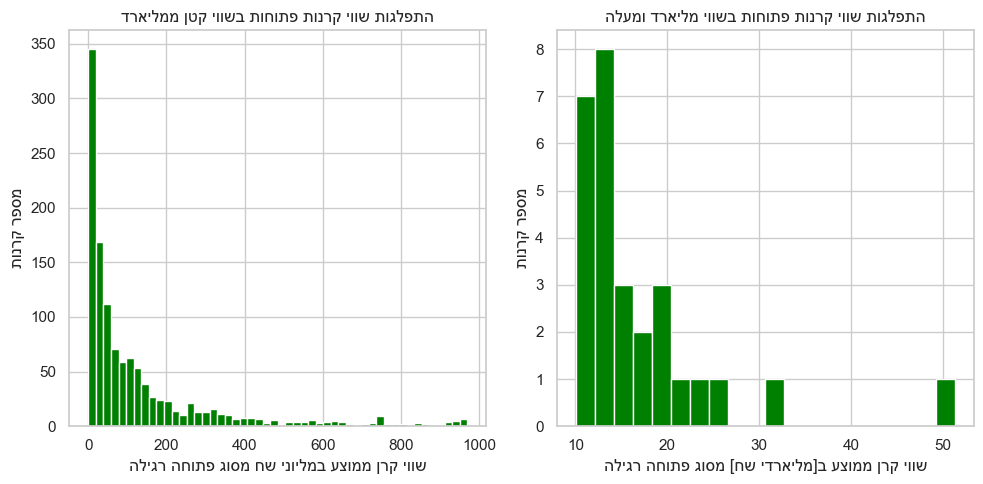

,Average_value_in_Millions
count,1240.000000
mean,167.769290
std,322.543558
min,0.063991
25%,16.900275
50%,55.688210
75%,168.891904
max,5134.575864


In [34]:
plt.figure(figsize=(10,5))

xhead= 'שווי קרן ממוצע במליוני שח מסוג פתוחה רגילה' 
yhead='מספר קרנות'
head='התפלגות שווי קרנות פתוחות בשווי קטן ממליארד'

xhead,yhead,head=xhead[::-1],yhead[::-1],head[::-1]

#נעמיד את 2 ההיסטוגרמות אחת על יד השניה
#התפלגות קרנות עד מליארד
plt.subplot(1, 2, 1)
for_hist0=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']<1000)]
plt.hist(for_hist0['Average_value_in_Millions'],bins=50,color='green')
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)
#plt.show()

#התפלגות קרנות פתוחות מליארד ומעלה
plt.subplot(1, 2, 2)
for_hist1=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']>1000)]

plt.hist(for_hist1['Average_value_in_Millions']/100,bins=20,color='green')
xhead,yhead= 'שווי קרן ממוצע ב]מליארדי שח[ מסוג פתוחה רגילה' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)
head='התפלגות שווי קרנות פתוחות בשווי מליארד ומעלה'
head=head[::-1]
plt.title(head)
plt.tight_layout()
plt.show()
df_03.loc[df_03['Fund_Type']=='פתוחה רגילה'][['Average_value_in_Millions']].describe()

#### התפלגות כמות נכסים בקרנות פתוחות:

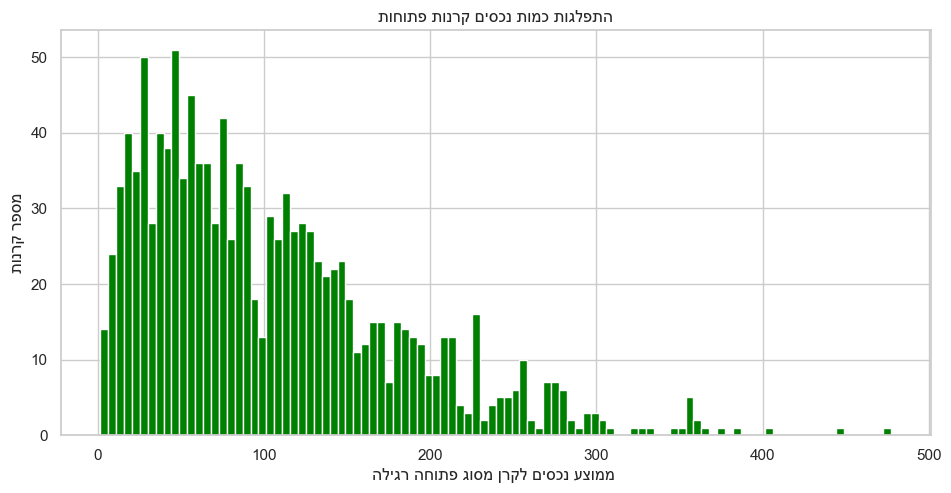

,Average_assets
count,1240.00
mean,103.11
std,75.81
min,1.33
25%,44.96
50%,84.75
75%,143.06
max,477.42


In [35]:
plt.figure(figsize=(10,5))


for_hist=df_03.loc[df_03['Fund_Type']=='פתוחה רגילה']

plt.hist(for_hist['Average_assets'],bins=100,color='green')
xhead,yhead= ' ממוצע נכסים לקרן מסוג פתוחה רגילה' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

head='התפלגות כמות נכסים קרנות פתוחות'
head=head[::-1]
plt.title(head)
plt.show()
df_03
for_hist[['Average_assets']].describe().round(2)

#### התפלגות התשואה בקרנות מסוג פתוחה רגילה


נציין כי חישוב התשואה נעשה רק בקרנות שהיו פעילות מינואר 2019 עד דצמבר 2019 ולכן יש 59 קרנות מסוג פתוחה רגילה שלא נראה בעבורם תשואה שנתית משום שהיו פעילות רק בחלק מהזמן בשנה 

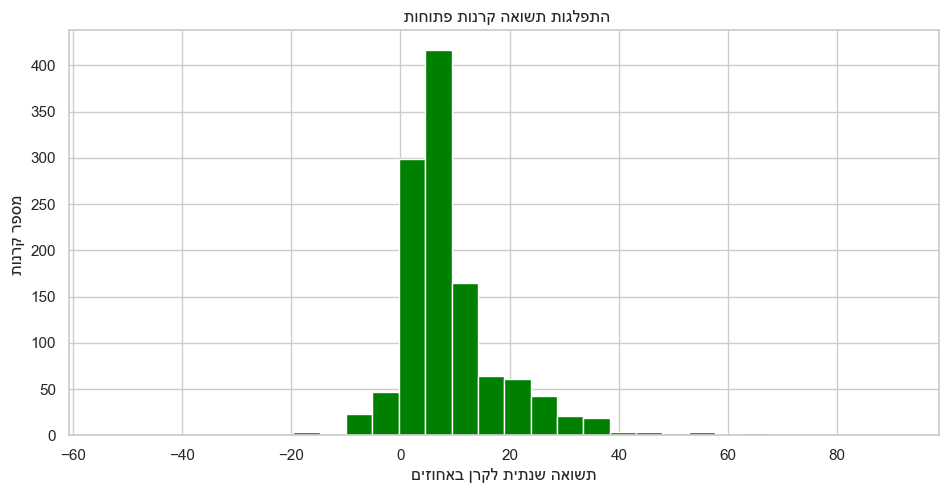

,Yield
count,1181.00
mean,8.85
std,10.38
min,-53.46
25%,3.38
50%,6.67
75%,11.31
max,91.49


In [98]:
head='התפלגות תשואה קרנות פתוחות '
head=head[::-1]
for_hist=df_03.loc[df_03['Fund_Type']=='פתוחה רגילה']
plt.figure(figsize=(10,5))
plt.hist(for_hist['Yield'],bins=30,linestyle='solid',color='green')
xhead="תשואה שנתית לקרן באחוזים"
yhead= " מספר קרנות"
xhead=xhead[::-1]
yhead=yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)
plt.show()
for_hist[['Yield']].describe().round(2)

#### קרנות מסוג: קרן מחקה - קרן פתוחה

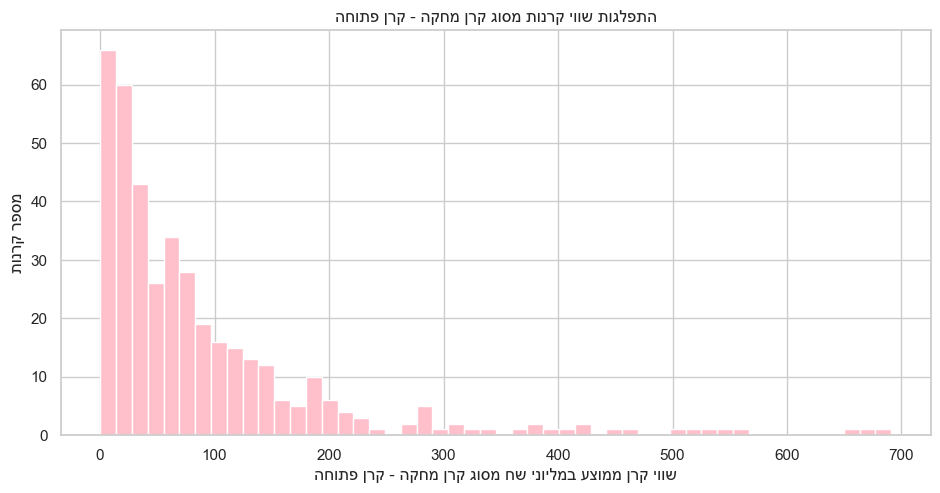

,Average_value_in_Millions
count,396.00
mean,90.29
std,110.87
min,0.21
25%,22.03
50%,56.00
75%,113.01
max,691.01


In [36]:
plt.figure(figsize=(10,5))

xhead= 'שווי קרן ממוצע במליוני שח מסוג קרן מחקה - קרן פתוחה' 
yhead='מספר קרנות'
head='התפלגות שווי קרנות מסוג קרן מחקה - קרן פתוחה'

xhead,yhead,head=xhead[::-1],yhead[::-1],head[::-1]

plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)

for_hist0=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
plt.hist(for_hist0['Average_value_in_Millions'],bins=50,color='pink')
plt.show()
df_03.loc[df_03['Fund_Type']=='קרן מחקה - קרן פתוחה'][['Average_value_in_Millions']].describe().round(2)

#### התפלגות כמות נכסים בקרנות מסוג קרן מחקה קרן פתוחה:

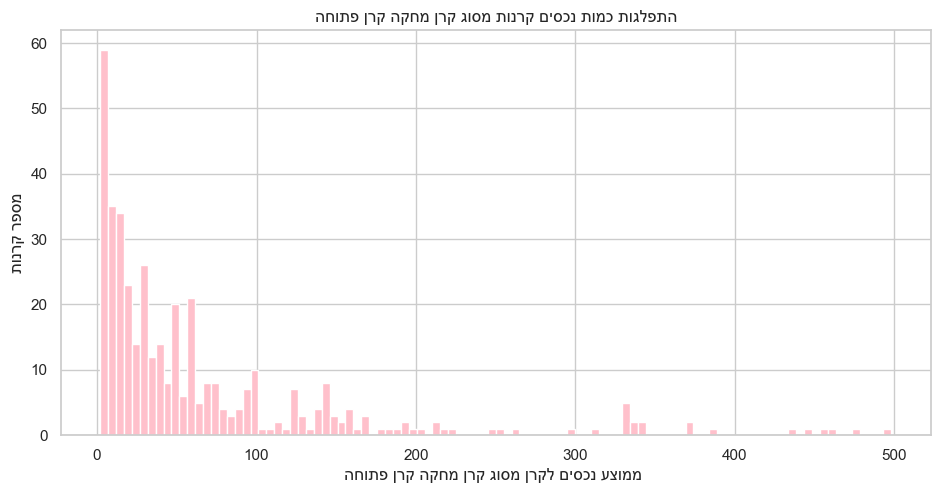

,Average_assets
count,396.00
mean,67.62
std,88.92
min,2.00
25%,12.56
50%,34.58
75%,79.84
max,498.08


In [37]:
plt.figure(figsize=(10,5))

for_hist=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
plt.hist(for_hist['Average_assets'],bins=100,color='pink')
xhead,yhead= ' ממוצע נכסים לקרן מסוג קרן מחקה קרן פתוחה' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

head='התפלגות כמות נכסים קרנות מסוג קרן מחקה קרן פתוחה'
head=head[::-1]
plt.title(head)
plt.show()
df_03
for_hist
for_hist[['Average_assets']].describe().round(2)

#### התפלגות התשואה בקרנות מסוג קרן מחקה קרן פתוחה:


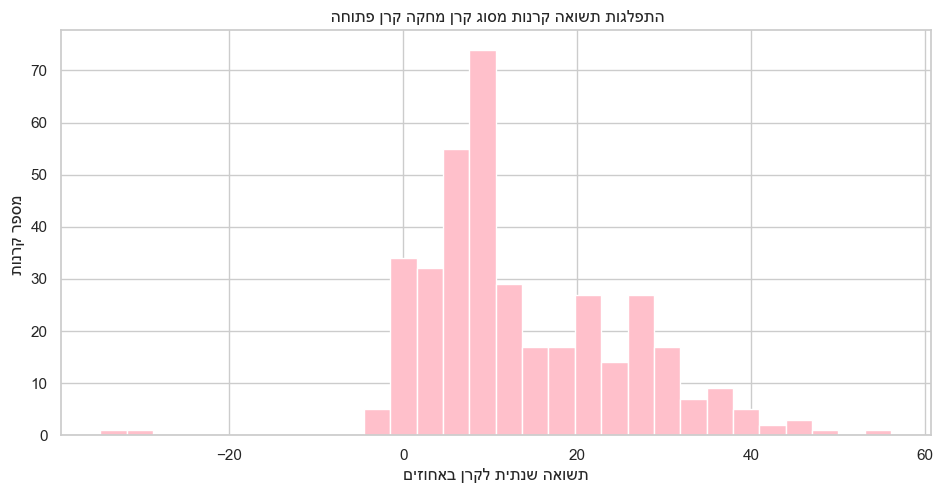

,Yield
count,378.00
mean,13.78
std,11.79
min,-34.84
25%,6.41
50%,9.75
75%,21.33
max,56.09


In [38]:
head='התפלגות תשואה קרנות מסוג קרן מחקה קרן פתוחה '
head=head[::-1]
for_hist=df_03.loc[(df_03['Fund_Type']=='קרן מחקה - קרן פתוחה')]
plt.figure(figsize=(10,5))
plt.hist(for_hist['Yield'],bins=30,linestyle='solid',color='pink')
xhead="תשואה שנתית לקרן באחוזים"
yhead= " מספר קרנות"
xhead=xhead[::-1]
yhead=yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)
plt.show()
for_hist[['Yield']].describe().round(2)

#### נסנן לפי קרנות מסוג קרן סל - קרן סגורה ונראה את התפלגויות השונות:


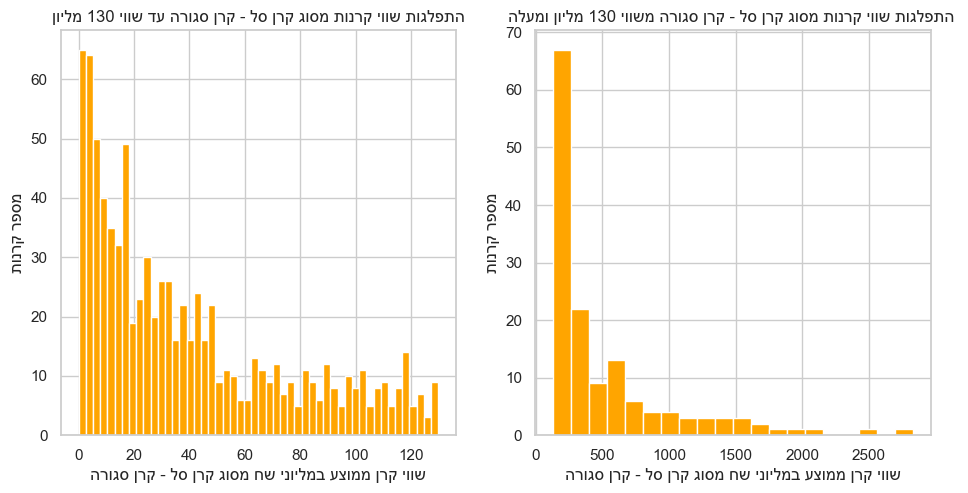

,Average_value_in_Millions
count,577.00
mean,156.62
std,327.43
min,0.10
25%,12.29
50%,46.78
75%,129.96
max,2828.56


In [39]:
plt.figure(figsize=(10,5))

xhead= 'שווי קרן ממוצע במליוני שח מסוג קרן סל - קרן סגורה' 
yhead='מספר קרנות'
head='התפלגות שווי קרנות מסוג קרן סל - קרן סגורה עד שווי 031 מליון'

xhead,yhead,head=xhead[::-1],yhead[::-1],head[::-1]

plt.subplot(1, 2, 1)
for_hist0=df_03.loc[(df_03['Fund_Type']=='פתוחה רגילה')& (df_03['Average_value_in_Millions']<130)]
plt.hist(for_hist0['Average_value_in_Millions'],bins=50,color='orange')
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)

plt.subplot(1, 2, 2)

for_hist0=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')& (df_03['Average_value_in_Millions']>130)]
plt.hist(for_hist0['Average_value_in_Millions'],bins=20,color='orange')
plt.xlabel(xhead)
plt.ylabel(yhead)
head=' התפלגות שווי קרנות מסוג קרן סל - קרן סגורה משווי 031 מליון ומעלה'
head=head[::-1]

plt.title(head)
plt.show()
df_03.loc[df_03['Fund_Type']=='קרן סל - קרן סגורה'][['Average_value_in_Millions']].describe().round(2)

#### התפלגות כמות נכסים בקרנות מסוג קרן סל - קרן סגורה:

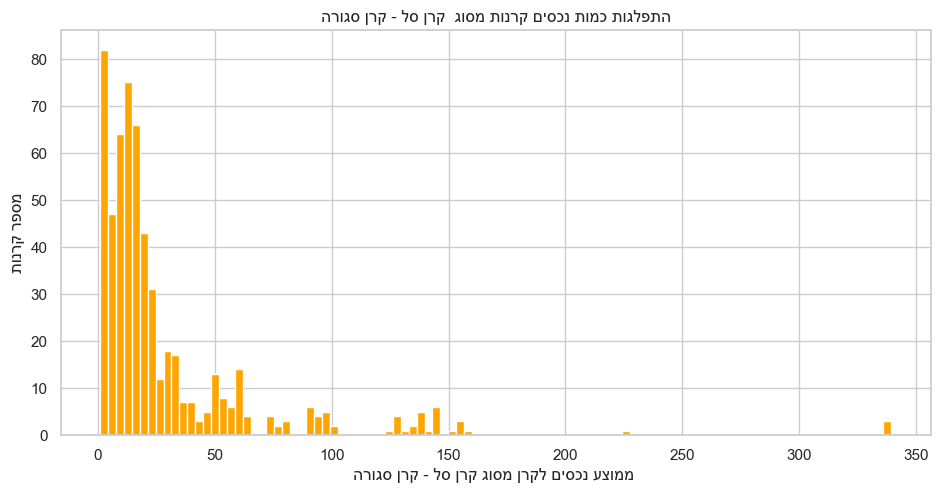

,Average_assets
count,577.00
mean,28.70
std,39.89
min,1.00
25%,8.58
50%,15.33
75%,30.42
max,339.42


In [40]:
plt.figure(figsize=(10,5))

for_hist=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')]
plt.hist(for_hist['Average_assets'],bins=100,color='orange')
xhead,yhead= ' ממוצע נכסים לקרן מסוג קרן סל - קרן סגורה' ,'מספר קרנות'
xhead,yhead=xhead[::-1],yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)

head='התפלגות כמות נכסים קרנות מסוג  קרן סל - קרן סגורה'
head=head[::-1]
plt.title(head)
plt.show()
df_03
for_hist
for_hist[['Average_assets']].describe().round(2)

#### התפלגות התשואה בקרנות מסוג קרן סל - קרן סגורה


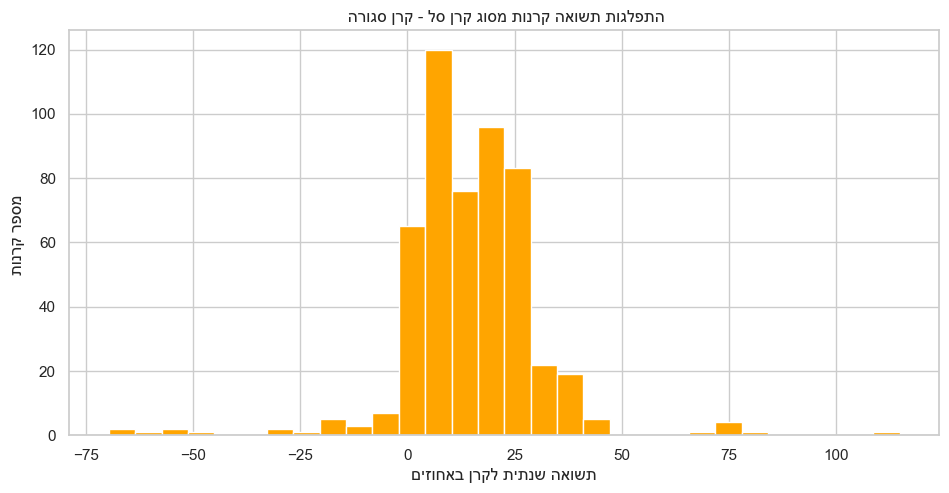

,Yield
count,517.00
mean,14.68
std,15.86
min,-69.59
25%,7.14
50%,14.69
75%,23.05
max,114.75


In [41]:
head='התפלגות תשואה קרנות מסוג קרן סל - קרן סגורה '
head=head[::-1]
for_hist=df_03.loc[(df_03['Fund_Type']=='קרן סל - קרן סגורה')]
plt.figure(figsize=(10,5))
plt.hist(for_hist['Yield'],bins=30,linestyle='solid',color='orange')
xhead="תשואה שנתית לקרן באחוזים"
yhead= " מספר קרנות"
xhead=xhead[::-1]
yhead=yhead[::-1]
plt.xlabel(xhead)
plt.ylabel(yhead)
plt.title(head)
plt.show()
for_hist[['Yield']].describe().round(2)

##### בעבור כל קרן נבדוק את כל הניירות שהיו לה לאורך כל השנה 

#### מקרים שבהם מצאנו שמספר הנייר שווה ל0:

מהתייעצות עם הלל נסנן מהדאטה פקדונות משום שהן לא מהוות "ניירות ערך אלא כמו מזומן בקרן

Identity_Num

100- פקדונות בבנק == מזומן בקרן

103- פקדונות בבנק == מזומן בקרן

55-סוואפ

54-סוואפ


בעצם הטבלה הזאתי מייצגת ב2 עמודות את כל הנכסים הייחודיפ לכל קרן לאורך השנה, (כלומר כל נכס שאי פעם היה בקרן במהלך השנה)

In [87]:
Assets_unique=pd.DataFrame(Data[['Fund_Number','Fund_Name','Identity_Num','Security_Num', 'Asset_name']])
Assets_unique=Assets_unique.loc[(Assets_unique['Identity_Num']<106)&(Assets_unique['Identity_Num']!=103)&(Assets_unique['Identity_Num']!=100)]
Assets_unique.head(60)
Assets_unique=(Assets_unique[['Fund_Number','Security_Num']].drop_duplicates())
Assets_unique#.sample (n=20)
#להשתמש כדי להציג דוגמא של קרן
#Assets_unique.loc[Assets_unique['Fund_Number']==5106109]

,Fund_Number,Security_Num
0,5100946,103010
1,5100946,1080241
2,5100946,1080324
3,5100946,1080456
4,5100946,1080613
...,...,...
3311432,5130380,6040323
3311433,5130380,6040422
3311434,5130380,6910137
3311435,5130380,7480155


#### נסנן מכל דוח חודשי רק את הנכסים  

In [88]:
#filter only assets from each month (consider loop):
Month1_assets=Data1.loc[(Data1['Identity_Num']<106)&(Data1['Identity_Num']!=103)&(Data1['Identity_Num']!=100)]
Month2_assets=Data2.loc[(Data2['Identity_Num']<106)&(Data2['Identity_Num']!=103)&(Data2['Identity_Num']!=100)]
Month3_assets=Data3.loc[(Data3['Identity_Num']<106)&(Data3['Identity_Num']!=103)&(Data3['Identity_Num']!=100)]
Month4_assets=Data4.loc[(Data4['Identity_Num']<106)&(Data4['Identity_Num']!=103)&(Data4['Identity_Num']!=100)]
Month5_assets=Data5.loc[(Data5['Identity_Num']<106)&(Data5['Identity_Num']!=103)&(Data5['Identity_Num']!=100)]
Month6_assets=Data6.loc[(Data6['Identity_Num']<106)&(Data6['Identity_Num']!=103)&(Data6['Identity_Num']!=100)]
Month7_assets=Data7.loc[(Data7['Identity_Num']<106)&(Data7['Identity_Num']!=103)&(Data7['Identity_Num']!=100)]
Month8_assets=Data8.loc[(Data8['Identity_Num']<106)&(Data8['Identity_Num']!=103)&(Data8['Identity_Num']!=100)]
Month9_assets=Data9.loc[(Data9['Identity_Num']<106)&(Data9['Identity_Num']!=103)&(Data9['Identity_Num']!=100)]
Month10_assets=Data10.loc[(Data10['Identity_Num']<106)&(Data10['Identity_Num']!=103)&(Data10['Identity_Num']!=100)]
Month11_assets=Data11.loc[(Data11['Identity_Num']<106)&(Data11['Identity_Num']!=103)&(Data11['Identity_Num']!=100)]
Month12_assets=Data12.loc[(Data12['Identity_Num']<106)&(Data12['Identity_Num']!=103)&(Data12['Identity_Num']!=100)]

#### כעת יש לנו בעבור כל קרן את כל הנכסים שלה לאורך השנה נחבר מדאטה של כל חודש את מספר היחידות של מספר הנייר בעזרת 

LEFT JOIN

In [89]:
list_months=[Month1_assets,Month2_assets,Month3_assets,Month4_assets,Month5_assets,Month6_assets,Month7_assets,Month8_assets,Month9_assets,Month10_assets,Month11_assets,Month12_assets]
for i in range(len(list_months)):
    curr_month=list_months[i]
    curr_month=pd.DataFrame(curr_month[['Fund_Number','Security_Num','Amount']])
    curr_month = curr_month.drop_duplicates(subset = ['Fund_Number', 'Security_Num'],keep = 'last').reset_index(drop = True)
    Assets_unique=pd.merge(Assets_unique,curr_month,on =['Fund_Number','Security_Num'],how ="left")
    curr_amount=('Amount_month'+str(i+1))
    Assets_unique.rename(columns={'Amount':curr_amount}, inplace=True)
Assets_unique = Assets_unique.fillna(0)
#Assets_unique=Assets_unique.loc[Assets_unique['Fund_Number']!=1145804]
Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12
0,5100946,103010,32945.0,28300.0,4798.0,4798.0,4798.0,4798.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,3243.0,3243.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,427.0,339.0,591.0,497.0,361.0,361.0,361.0,361.0,361.0,469.0,390.0,390.0
3,5100946,1080456,1059.0,678.0,794.0,794.0,764.0,764.0,651.0,399.0,399.0,239.0,239.0,239.0
4,5100946,1080613,637.0,637.0,452.0,452.0,452.0,452.0,26.0,26.0,26.0,26.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267462,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2164818.0
267463,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2829509.0
267464,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459434.0
267465,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2603231.0


In [45]:
Test1=pd.DataFrame(Assets_unique[['Fund_Number','Security_Num']])
Test1['Diff_month1_2']=Assets_unique['Amount_month2']-Assets_unique['Amount_month1']
Test1['Diff_month2_3']=Assets_unique['Amount_month3']-Assets_unique['Amount_month2']
Test1['Diff_month3_4']=Assets_unique['Amount_month4']-Assets_unique['Amount_month3']
Test1['Diff_month4_5']=Assets_unique['Amount_month5']-Assets_unique['Amount_month4']
Test1['Diff_month5_6']=Assets_unique['Amount_month6']-Assets_unique['Amount_month5']
Test1['Diff_month6_7']=Assets_unique['Amount_month7']-Assets_unique['Amount_month6']
Test1['Diff_month7_8']=Assets_unique['Amount_month8']-Assets_unique['Amount_month7']
Test1['Diff_month8_9']=Assets_unique['Amount_month9']-Assets_unique['Amount_month8']
Test1['Diff_month9_10']=Assets_unique['Amount_month10']-Assets_unique['Amount_month9']
Test1['Diff_month10_11']=Assets_unique['Amount_month11']-Assets_unique['Amount_month10']
Test1['Diff_month11_12']=Assets_unique['Amount_month12']-Assets_unique['Amount_month11']




Test1.loc[Test1['Diff_month1_2'] != 0, 'Diff_month1_2'] = 1
Test1.loc[Test1['Diff_month2_3'] != 0, 'Diff_month2_3'] = 1
Test1.loc[Test1['Diff_month3_4'] != 0, 'Diff_month3_4'] = 1
Test1.loc[Test1['Diff_month4_5'] != 0, 'Diff_month4_5'] = 1
Test1.loc[Test1['Diff_month5_6'] != 0, 'Diff_month5_6'] = 1
Test1.loc[Test1['Diff_month6_7'] != 0, 'Diff_month6_7'] = 1
Test1.loc[Test1['Diff_month7_8'] != 0, 'Diff_month7_8'] = 1
Test1.loc[Test1['Diff_month8_9'] != 0, 'Diff_month8_9'] = 1
Test1.loc[Test1['Diff_month9_10'] != 0, 'Diff_month9_10'] = 1
Test1.loc[Test1['Diff_month10_11'] != 0, 'Diff_month10_11'] = 1
Test1.loc[Test1['Diff_month11_12'] != 0, 'Diff_month11_12'] = 1

Test2=pd.DataFrame(Test1[['Fund_Number','Security_Num']])

Test2['Total_Changes']=Test1['Diff_month1_2']+Test1['Diff_month2_3']+Test1['Diff_month3_4']+Test1['Diff_month4_5']+Test1['Diff_month5_6']+Test1['Diff_month6_7']+Test1['Diff_month7_8']+Test1['Diff_month8_9']+Test1['Diff_month9_10']+Test1['Diff_month10_11']+Test1['Diff_month11_12']


In [46]:
Test1

,Fund_Number,Security_Num,Diff_month1_2,Diff_month2_3,Diff_month3_4,Diff_month4_5,Diff_month5_6,Diff_month6_7,Diff_month7_8,Diff_month8_9,Diff_month9_10,Diff_month10_11,Diff_month11_12
0,5100946,103010,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,5100946,1080456,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5100946,1080613,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898728,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
898729,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
898730,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
898731,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
Test2

,Fund_Number,Security_Num,Total_Changes
0,5100946,103010,3.0
1,5100946,1080241,2.0
2,5100946,1080324,6.0
3,5100946,1080456,6.0
4,5100946,1080613,2.0
...,...,...,...
898728,5130380,6040323,1.0
898729,5130380,6040422,1.0
898730,5130380,6910137,1.0
898731,5130380,7480155,1.0


In [48]:
Assets_unique.loc[Assets_unique['Amount_month1'] != 0, 'Amount_month1'] = 1
Assets_unique.loc[Assets_unique['Amount_month2'] != 0, 'Amount_month2'] = 1
Assets_unique.loc[Assets_unique['Amount_month3'] != 0, 'Amount_month3'] = 1
Assets_unique.loc[Assets_unique['Amount_month4'] != 0, 'Amount_month4'] = 1
Assets_unique.loc[Assets_unique['Amount_month5'] != 0, 'Amount_month5'] = 1
Assets_unique.loc[Assets_unique['Amount_month6'] != 0, 'Amount_month6'] = 1
Assets_unique.loc[Assets_unique['Amount_month7'] != 0, 'Amount_month7'] = 1
Assets_unique.loc[Assets_unique['Amount_month8'] != 0, 'Amount_month8'] = 1
Assets_unique.loc[Assets_unique['Amount_month9'] != 0, 'Amount_month9'] = 1
Assets_unique.loc[Assets_unique['Amount_month10'] != 0, 'Amount_month10'] = 1
Assets_unique.loc[Assets_unique['Amount_month11'] != 0, 'Amount_month11'] = 1
Assets_unique.loc[Assets_unique['Amount_month12'] != 0, 'Amount_month12'] = 1

Assets_unique['sum']=(Assets_unique['Amount_month1']+Assets_unique['Amount_month2']+Assets_unique['Amount_month3']+Assets_unique['Amount_month4']+Assets_unique['Amount_month5']+Assets_unique['Amount_month6']+Assets_unique['Amount_month7']+Assets_unique['Amount_month8']+Assets_unique['Amount_month9']+Assets_unique['Amount_month10']+Assets_unique['Amount_month11']+Assets_unique['Amount_month12'])/12
Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12,sum
0,5100946,103010,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
1,5100946,1080241,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
2,5100946,1080324,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
3,5100946,1080456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
4,5100946,1080613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898728,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898729,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898730,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898731,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333


ממוצע נכסים ומספר שינויים בקרן

In [49]:
Assets_unique.sample(20)
Average=Assets_unique.groupby(['Fund_Number'])['sum'].sum().reset_index(name='Average_assets')

#Test2
Fund_Changes=Test2.groupby(['Fund_Number'])['Total_Changes'].sum().reset_index(name='Fund_Changes')


Changes_vs_Assets=pd.merge(Average,Fund_Changes,on =['Fund_Number'], how ="inner")

Changes_vs_Assets

,Fund_Number,Average_assets,Fund_Changes
0,1142538,32.916667,98.0
1,1143700,47.750000,666.0
2,1143718,144.083333,1778.0
3,1143726,5.083333,57.0
4,1143734,21.833333,167.0
...,...,...,...
2264,5231030,124.333333,361.0
2265,5231055,107.250000,177.0
2266,5231097,14.416667,63.0
2267,5520028,221.000000,891.0


In [50]:
Changes_vs_Assets['Rate']=Changes_vs_Assets['Fund_Changes']/Changes_vs_Assets['Average_assets']
Changes_vs_Assets

,Fund_Number,Average_assets,Fund_Changes,Rate
0,1142538,32.916667,98.0,2.977215
1,1143700,47.750000,666.0,13.947644
2,1143718,144.083333,1778.0,12.340081
3,1143726,5.083333,57.0,11.213115
4,1143734,21.833333,167.0,7.648855
...,...,...,...,...
2264,5231030,124.333333,361.0,2.903485
2265,5231055,107.250000,177.0,1.650350
2266,5231097,14.416667,63.0,4.369942
2267,5520028,221.000000,891.0,4.031674


ממצאים

In [62]:
test3=pd.merge(Changes_vs_Assets,year_yield,on =['Fund_Number'], how ="left")
Fund_type=pd.DataFrame(Data[['Fund_Number','Fund_Type']])
Fund_type=(Fund_type[['Fund_Number','Fund_Type']].drop_duplicates())
test3=pd.merge(test3,Fund_type,on =['Fund_Number'], how ="left")
test3

,Fund_Number,Average_assets,Fund_Changes,Rate,Yield,Fund_Type
0,1142538,32.916667,98.0,2.977215,-100.00,קרן טכנולוגיה עילית - קרן סגורה
1,1143700,47.750000,666.0,13.947644,14.84,קרן סל - קרן סגורה
2,1143718,144.083333,1778.0,12.340081,21.11,קרן סל - קרן סגורה
3,1143726,5.083333,57.0,11.213115,26.26,קרן סל - קרן סגורה
4,1143734,21.833333,167.0,7.648855,34.84,קרן סל - קרן סגורה
...,...,...,...,...,...,...
2264,5231030,124.333333,361.0,2.903485,8.90,פתוחה רגילה
2265,5231055,107.250000,177.0,1.650350,5.91,פתוחה רגילה
2266,5231097,14.416667,63.0,4.369942,-6.00,פתוחה רגילה
2267,5520028,221.000000,891.0,4.031674,5.74,פתוחה רגילה


In [63]:
test3.loc[test3['Fund_Type']=='פתוחה רגילה','Open_regular_Fund']=1
test3.loc[test3['Fund_Type']=='קרן סל - קרן סגורה','Closed_ETF_Fund']=1
test3.loc[test3['Fund_Type']=='קרן מחקה - קרן פתוחה','Open_index_Fund']=1
test3.loc[test3['Fund_Type']=='קרן טכנולוגיה עילית - קרן סגורה','closed_hi_tech_Fund']=1
test3=test3.fillna(0)
test3 = swap_columns(test3,'closed_hi_tech_Fund' ,'Yield')
test3= swap_columns(test3,'Open_index_Fund','Rate')
test3.corr()

,Fund_Number,Average_assets,Fund_Changes,Open_index_Fund,closed_hi_tech_Fund,Open_regular_Fund,Closed_ETF_Fund,Rate,Yield
Fund_Number,1.000000,-0.009926,-0.020064,0.286989,-0.033820,0.682058,-0.937699,-0.431607,-0.109793
Average_assets,-0.009926,1.000000,0.998696,-0.015721,-0.001124,0.003058,0.013699,-0.024788,-0.016932
Fund_Changes,-0.020064,0.998696,1.000000,-0.000669,-0.001225,-0.017579,0.023306,0.003828,-0.015889
Open_index_Fund,0.286989,-0.015721,-0.000669,1.000000,-0.009655,-0.504756,-0.268202,0.405994,0.099541
closed_hi_tech_Fund,-0.033820,-0.001124,-0.001225,-0.009655,1.000000,-0.023051,-0.012248,-0.023904,-0.184572
Open_regular_Fund,0.682058,0.003058,-0.017579,-0.504756,-0.023051,1.000000,-0.640304,-0.699545,-0.174903
Closed_ETF_Fund,-0.937699,0.013699,0.023306,-0.268202,-0.012248,-0.640304,1.000000,0.402327,0.126105
Rate,-0.431607,-0.024788,0.003828,0.405994,-0.023904,-0.699545,0.402327,1.000000,0.046720
Yield,-0.109793,-0.016932,-0.015889,0.099541,-0.184572,-0.174903,0.126105,0.046720,1.000000


In [53]:
test3.corr()

,Fund_Number,Average_assets,Fund_Changes,Open_index_Fund,closed_hi_tech_Fund,Open_regular_Fund,Closed_ETF_Fund,Rate,Yield
Fund_Number,1.000000,-0.009926,-0.020064,0.286989,-0.033820,0.682058,-0.937699,-0.431607,-0.109793
Average_assets,-0.009926,1.000000,0.998696,-0.015721,-0.001124,0.003058,0.013699,-0.024788,-0.016932
Fund_Changes,-0.020064,0.998696,1.000000,-0.000669,-0.001225,-0.017579,0.023306,0.003828,-0.015889
Open_index_Fund,0.286989,-0.015721,-0.000669,1.000000,-0.009655,-0.504756,-0.268202,0.405994,0.099541
closed_hi_tech_Fund,-0.033820,-0.001124,-0.001225,-0.009655,1.000000,-0.023051,-0.012248,-0.023904,-0.184572
Open_regular_Fund,0.682058,0.003058,-0.017579,-0.504756,-0.023051,1.000000,-0.640304,-0.699545,-0.174903
Closed_ETF_Fund,-0.937699,0.013699,0.023306,-0.268202,-0.012248,-0.640304,1.000000,0.402327,0.126105
Rate,-0.431607,-0.024788,0.003828,0.405994,-0.023904,-0.699545,0.402327,1.000000,0.046720
Yield,-0.109793,-0.016932,-0.015889,0.099541,-0.184572,-0.174903,0.126105,0.046720,1.000000


In [54]:
#לעשות פלוטים לפי סוג קרן +טבלת קורולוציות
#הנתון הוא באחוזים כמובן

#### כעת נתרכז רק בקרנות אקטיביות נסנן לפיהם ונבחן מחדש קורולציה בין תחלופת נכסים לבין המדד הבינארי שבנינו

In [66]:
opentest3.loc[test3['Open_index_Fund']==1]

x=test3['Rate']
y=test3['Yield']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()
#להפעיל פונקציית פירסון בין הוקטורים, וגם פונקציית .corr שבודקת 
#לסנן לפי סוגים שונים 
#להוסיף סטטיסטיקה 
#EDA סטטיסטיקה תיאורית
#5 עמודים של סטטיסטיקה תיאורית
np.corrcoef(x,y)


,Fund_Number,Average_assets,Fund_Changes,Open_index_Fund,closed_hi_tech_Fund,Fund_Type,Open_regular_Fund,Closed_ETF_Fund,Rate,Yield
685,5101506,34.833333,386.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,11.081340,15.42
927,5108857,5.666667,64.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,11.294118,3.93
946,5109418,34.833333,386.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,11.081340,14.82
962,5109889,126.166667,1402.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,11.112285,21.22
963,5109897,35.000000,389.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,11.114286,14.96
...,...,...,...,...,...,...,...,...,...,...
2221,5130281,4.000000,49.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,12.250000,1.46
2222,5130299,14.166667,171.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,12.070588,-1.13
2226,5130331,4.666667,56.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,12.000000,0.23
2230,5130380,2.750000,33.0,1.0,0.0,קרן מחקה - קרן פתוחה,0.0,0.0,12.000000,-0.13


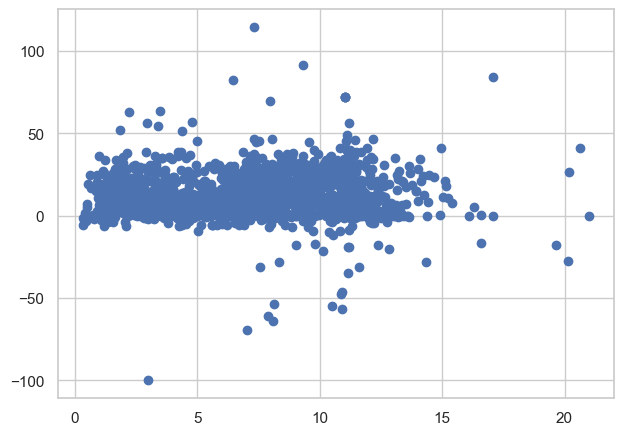

array([[1.        , 0.04672041],
       [0.04672041, 1.        ]])

In [64]:
#test3.plot.scatter(x = 'Rate', y = 'Yield', s =10)


x=test3['Rate']
y=test3['Yield']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.show()
#להפעיל פונקציית פירסון בין הוקטורים, וגם פונקציית .corr שבודקת 
#לסנן לפי סוגים שונים 
#להוסיף סטטיסטיקה 
#EDA סטטיסטיקה תיאורית
#5 עמודים של סטטיסטיקה תיאורית
np.corrcoef(x,y)

In [56]:
#Assets_unique=pd.merge(Assets_unique,Average,on =['Fund_Number'], how ="left")


#Assets_unique=pd.merge(Assets_unique,Month1_assets,on =['Fund_Number','Security_Num'], how ="left")

Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12,sum
0,5100946,103010,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
1,5100946,1080241,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
2,5100946,1080324,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
3,5100946,1080456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
4,5100946,1080613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898728,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898729,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898730,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898731,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333


In [57]:
Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12,sum
0,5100946,103010,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
1,5100946,1080241,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
2,5100946,1080324,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
3,5100946,1080456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
4,5100946,1080613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898728,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898729,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898730,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333
898731,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.083333


נקרא קבצי דמוגרפיית קרנות וקובץ סיווגי ניירות ערך שעשוי לשמש אותנו בהמשך 

In [48]:

#SIVUG=pd.read_csv('C:\\Users\\chana\\Desktop\\ProjectData\\SIVUG.csv',encoding='UTF-8')
#SIVUG[:12]

ניקח מהדאטה הכולל את עמודות -תאריך, מספר קרן, שם הקרן, מספר מזהה של נכס (לא של קרן), כמות הנכסים, שווי נכסים

In [58]:
Data = Data.reset_index(drop = True)  

yield_data=Data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value']]

yield_data["Report_Date"] = pd.to_datetime(yield_data["Report_Date"])

נפלטר את הדאטה לפי שורות שמכילות בעמודת מספר מזהה (מזהה נכס ולא קרן) 

א. את הערך 300 שמבטא שווי כולל של נכסים

ב. את הערך 301 שמבטא כמות יחידות כולל בקרן

נמיין את הדאטה כך שיהיה ממויין לפי תאריך בסדר עולה ולפי מספר קרן

In [50]:
groups=[300,301]

yield_data=yield_data[yield_data['Identity_Num'].isin(groups)]

yield_data=yield_data.sort_values(['Fund_Number','Report_Date'], ascending=(True,True))

yield_data = yield_data.reset_index(drop = True)  

rows = len(yield_data.axes[0])
cols = len(yield_data.axes[1])
  
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

yield_data.head(30)

yield_data['month'] = pd.DatetimeIndex(yield_data['Report_Date']).month
yield_data


#yield_data.loc[yield_data['Fund_Number']==5129523]


Number of Rows: 50232
Number of Columns: 6


,Report_Date,Fund_Number,Fund_Name,Identity_Num,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,300,0.0,400503965,1
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,1
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,406261884,2
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,0,2
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,411243664,3
...,...,...,...,...,...,...,...
50227,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,301,2407656.0,0,10
50228,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,300,0.0,14659667,11
50229,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,301,2445678.0,0,11
50230,2019-12-31,5520044,מיטב סקיי (4D) השקעות ...,300,0.0,15130280,12


 נוריד את העמודה שווי נכסים שורה אחת למטה על מנת שנוכל לחשב את מחיר היחידה של כל קרן

In [51]:
yield_data=yield_data.sort_values(['Fund_Number','Report_Date','Identity_Num'], ascending=(True,True,True))
yield_data['Value'] = yield_data.Value.shift(1)
yield_data.reset_index(drop = True)
yield_data.head(30)
#yield_data.to_excel(r'C:\\Users\\chana\\Desktop\\ProjectData\\Amount.xlsx', index=False)

,Report_Date,Fund_Number,Fund_Name,Identity_Num,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,300,0.0,NaN,1
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,4.005040e+08,1
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,0.000000e+00,2
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,4.062619e+08,2
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,300,0.0,0.000000e+00,3
5,2019-03-28,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,4.112437e+08,3
6,2019-04-30,1142538,איביאי (Tech Fund (5D ...,300,0.0,0.000000e+00,4
7,2019-04-30,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,4.186448e+08,4
8,2019-05-30,1142538,איביאי (Tech Fund (5D ...,300,0.0,0.000000e+00,5
9,2019-05-30,1142538,איביאי (Tech Fund (5D ...,301,403144606.0,4.142966e+08,5


נוריד את כל השורות הריקות ואת העמודה מספר מזהה 

In [52]:
yield_data = yield_data[yield_data.Amount != 0]
yield_data=yield_data.drop('Identity_Num',axis=1)
yield_data = yield_data.reset_index(drop = True)
yield_data.head(3)

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3


נחשב מחיר יחידה ששווה לשווי נכסים חלקי מספר יחידות וניצור עמודת תשואה שהוא שיעור שינוי באחוזים בין מחיר יחידה חודש נוכחי לחודש קודם 

In [53]:
yield_data['Price_YECHIDA']=yield_data.Value/yield_data.Amount
yield_data['yield']=yield_data['Price_YECHIDA'].pct_change()
year_yield=yield_data
yield_data.head(30)

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.005040e+08,1,0.993450,NaN
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.062619e+08,2,1.007732,0.014377
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.112437e+08,3,1.020090,0.012262
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.186448e+08,4,1.038448,0.017997
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.142966e+08,5,1.027663,-0.010386
5,2019-06-27,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.144814e+08,6,1.028121,0.000446
6,2019-07-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.247565e+08,7,1.053608,0.024790
7,2019-08-29,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.206887e+08,8,1.043518,-0.009577
8,2019-09-26,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.213857e+08,9,1.045247,0.001657
9,2019-10-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.328744e+08,10,1.073745,0.027264


ניצור עמודת עזר שיבדוק שינוי במספר קרן 

על מנת לנטרל חישובים שגויים בהם חישבנו תשואה בעבור קרן שונה כמו שאפשר לראות בשורה 12

בשורות בהם ההפרש בין מספר קרן אחד לשני הוא לא 0 (כלומר לא אותה קרן) נשנה את הערך בשורת תשואה לערך נאן

In [54]:
yield_data['change']=yield_data['Fund_Number'].diff()
yield_data.loc[yield_data['change'] != 0, 'yield'] = np.nan
yield_data.head(15)

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield,change
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.005040e+08,1,0.993450,NaN,NaN
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.062619e+08,2,1.007732,0.014377,0.0
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.112437e+08,3,1.020090,0.012262,0.0
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.186448e+08,4,1.038448,0.017997,0.0
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.142966e+08,5,1.027663,-0.010386,0.0
5,2019-06-27,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.144814e+08,6,1.028121,0.000446,0.0
6,2019-07-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.247565e+08,7,1.053608,0.024790,0.0
7,2019-08-29,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.206887e+08,8,1.043518,-0.009577,0.0
8,2019-09-26,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.213857e+08,9,1.045247,0.001657,0.0
9,2019-10-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,4.328744e+08,10,1.073745,0.027264,0.0


נוריד את עמודת העזר ונראה את הטבלה כעת

In [55]:
yield_data=yield_data.drop('change',axis=1)
yield_data.head(15)
yield_data.to_excel(r'C:\\Users\\chana\\Desktop\\ProjectData\\yield_data.xlsx', index=False)

ניצור טבלה חדשה נקח מהדאטה גולמי את עמודות תאריך דיווח, מספר הקרן, שם הקרן, סוג הקרן (פתוחה/סגורה), מספר מזהה (נייר ערך), מספר נייר, ואחוז הנייר מקרן

נסנן ונקח רק את מה שמספר המזהה שלו קטן מ106 (כלומר נקח רק ניירות ערך)

נמיין לפי תאריך ומספר קרן כך שכל הניירות מסוג מסויים בקרן מסויים יופיעו ברצף בסדר כרונולוגי

In [56]:
funds_assets=pd.DataFrame(Data[['Report_Date','Fund_Number','Fund_Name','Fund_Type','Identity_Num','Security_Num', 'Asset_name','Precent_From_Fund']])
funds_assets=funds_assets.loc[funds_assets['Identity_Num']<106]
funds_assets["Report_Date"] = pd.to_datetime(funds_assets["Report_Date"])
funds_assets=funds_assets.sort_values(['Fund_Number','Security_Num','Report_Date'], ascending=(True,True,True))
funds_assets=funds_assets.reset_index(drop = True)
funds_assets.head(60)

,Report_Date,Fund_Number,Fund_Name,Fund_Type,Identity_Num,Security_Num,Asset_name,Precent_From_Fund
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.37
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.92
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.17
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,1.59
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,-0.40
5,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.00
6,2019-04-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.85
7,2019-04-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,1.00
8,2019-05-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.18
9,2019-05-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.59


נייצר 3 עמודות עזר שבודקות שינוי קרן, שינוי במספר נייר ושינוי בתאריך  

In [57]:
funds_assets['change_keren']=funds_assets['Fund_Number'].diff()

funds_assets['match_stock'] = funds_assets['Security_Num'].eq(funds_assets['Security_Num'].shift())
funds_assets

funds_assets['match_date'] = funds_assets['Report_Date'].eq(funds_assets['Report_Date'].shift())
datd_new=funds_assets
funds_assets.head(40)
funds_assets

,Report_Date,Fund_Number,Fund_Name,Fund_Type,Identity_Num,Security_Num,Asset_name,Precent_From_Fund,change_keren,match_stock,match_date
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.37,NaN,False,False
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.92,0.0,True,True
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.17,0.0,True,False
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,1.59,0.0,True,True
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,-0.40,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2073395,2019-07-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.26,0.0,True,False
2073396,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.49,0.0,True,False
2073397,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.50,0.0,True,False
2073398,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.41,0.0,True,False


במידה והקרן אותה הקרן (ההפרש בערכים =0) , התאריך הוא חודש אחד אחורה והמספר נייר זהה - נרצה לבדוק את אחוז השינוי 

נעשה זאת על ידי יצירת עמודה בוליאנית בשם צ'ק

ניתן לראות שבשורה 36 יש ערך נאן משום שלא נרצה לבדוק שינוי בין ניירות שלא זהים במספר

In [58]:
funds_assets.loc[(funds_assets['match_date'] == False) & (funds_assets['match_stock']==True)& (funds_assets['change_keren']==0),'check']=True
funds_assets

,Report_Date,Fund_Number,Fund_Name,Fund_Type,Identity_Num,Security_Num,Asset_name,Precent_From_Fund,change_keren,match_stock,match_date,check
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.37,NaN,False,False,NaN
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.92,0.0,True,True,NaN
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.17,0.0,True,False,True
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,1.59,0.0,True,True,NaN
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,-0.40,0.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2073395,2019-07-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.26,0.0,True,False,True
2073396,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.49,0.0,True,False,True
2073397,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.50,0.0,True,False,True
2073398,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.41,0.0,True,False,True


נחשב כעת את השיעור שינוי באחוז מקרן על פי התנאים שהגדרנו

In [59]:
funds_assets['culc']=np.where(funds_assets['check']==True, funds_assets['Precent_From_Fund'].diff(),np.nan)
funds_assets['culc']=funds_assets['culc']/100
funds_assets[24:40]

,Report_Date,Fund_Number,Fund_Name,Fund_Type,Identity_Num,Security_Num,Asset_name,Precent_From_Fund,change_keren,match_stock,match_date,check,culc
24,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,False,False,NaN,NaN
25,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,0.0000
26,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,0.0000
27,2019-04-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,0.0000
28,2019-05-30,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,0.0000
29,2019-06-27,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,0.0000
30,2019-07-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.05,0.0,True,False,True,0.0001
31,2019-08-29,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.04,0.0,True,False,True,-0.0001
32,2019-09-26,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.05,0.0,True,False,True,0.0001
33,2019-10-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,1,1082965,אודיוקודס מ''ר 0.01ש''ח ...,0.05,0.0,True,False,True,0.0000


נסכום את השיעור שינוי הכולל ברמת הקרן ברמה החודשית 

In [60]:
change=funds_assets.groupby(['Fund_Number', 'Report_Date'])['culc'].sum().reset_index(name='total_change')

merged = pd.merge(yield_data,change, on =['Fund_Number','Report_Date'] , how ="inner")


נציג תוצאה של סכימת השינוי בקרן

In [61]:
change

,Fund_Number,Report_Date,total_change
0,1142538,2019-01-31,0.0000
1,1142538,2019-02-28,0.0020
2,1142538,2019-03-28,0.0406
3,1142538,2019-04-30,0.0095
4,1142538,2019-05-30,-0.0050
...,...,...,...
25101,5520044,2019-08-29,0.0304
25102,5520044,2019-09-26,-0.0110
25103,5520044,2019-10-31,0.0201
25104,5520044,2019-11-27,-0.0075


In [62]:
merged

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield,total_change
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1,0.993450,NaN,0.0000
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2,1.007732,0.014377,0.0020
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3,1.020090,0.012262,0.0406
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4,1.038448,0.017997,0.0095
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5,1.027663,-0.010386,-0.0050
...,...,...,...,...,...,...,...,...,...
25100,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8,5.525921,-0.009160,0.0304
25101,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9,5.736607,0.038127,-0.0110
25102,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10,5.900236,0.028524,0.0201
25103,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11,5.994112,0.015910,-0.0075


נמיין מהטבלה הסופית שלנו מספר קרנות ונשווה את אותם קרנות לדאטה הגולמי על ידי יצוא לאקסל

In [63]:
fund_nums=[5106828,5520044,1144260,1143700,1146307]
data_check=merged[merged['Fund_Number'].isin(fund_nums)]
data_check_row=Data[Data['Fund_Number'].isin(fund_nums)]

data_check.to_excel(r'C:\\Users\\chana\\Desktop\\ProjectData\\data_check.xlsx', index=False)

data_check_row.to_excel(r'C:\\Users\\chana\\Desktop\\ProjectData\\data_check_row.xlsx', index=False)

לאחר בדיקה הבנתי ששכחתי להוסיף עמודת סינון למעלה כמו שרואים פה בשורה הרביעית להוסיף ולוודא ששאר הנתונים נשארים טובים

In [64]:
data_check_row=Data[(Data['Fund_Number']==1146307)&((Data['Identity_Num']==300)|(Data['Identity_Num']==301))]
data_check_row=data_check_row[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value']]
data_check_row

,Report_Date,Fund_Number,Fund_Name,Identity_Num,Amount,Value
43913,2019-01-31,1146307,קסם Stox600 Banks ETF מא ...,300,0.0,16736978
43914,2019-01-31,1146307,קסם Stox600 Banks ETF מא ...,301,513485.0,0
314006,2019-02-28,1146307,קסם Stox600 Banks ETF מא ...,300,0.0,16287724
314007,2019-02-28,1146307,קסם Stox600 Banks ETF מא ...,301,475309.0,0
597238,2019-03-28,1146307,קסם Stox600 Banks ETF מא ...,301,445657.0,0
597241,2019-03-28,1146307,קסם Stox600 Banks ETF מא ...,300,0.0,14556758
888022,2019-04-30,1146307,קסם Stox600 Banks ETF מא ...,300,0.0,15231810
888023,2019-04-30,1146307,קסם Stox600 Banks ETF מא ...,301,426896.0,0
1137518,2019-05-29,1146307,קסם Stox600 Banks ETF מא ...,300,0.0,13490497
1137519,2019-05-29,1146307,קסם Stox600 Banks ETF מא ...,301,415202.0,0


In [65]:
merged

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield,total_change
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1,0.993450,NaN,0.0000
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2,1.007732,0.014377,0.0020
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3,1.020090,0.012262,0.0406
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4,1.038448,0.017997,0.0095
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5,1.027663,-0.010386,-0.0050
...,...,...,...,...,...,...,...,...,...
25100,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8,5.525921,-0.009160,0.0304
25101,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9,5.736607,0.038127,-0.0110
25102,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10,5.900236,0.028524,0.0201
25103,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11,5.994112,0.015910,-0.0075


נדגום 3 קרנות ונראה את השינוי לאורך זמן בתשואה ביחס לשינוי בנכסים

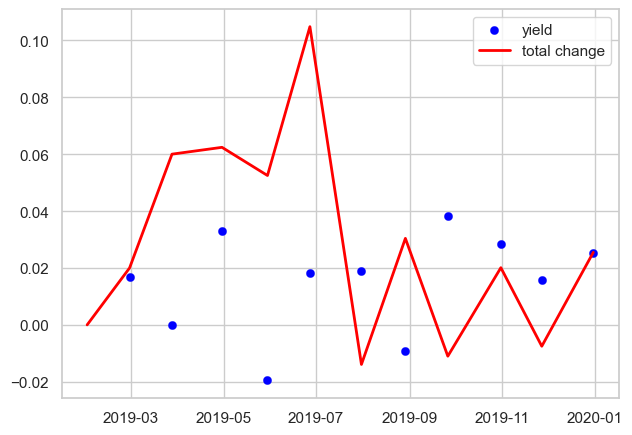

In [66]:
#fund_nums=[5106828,5520044,1144260,1143700,1146307]

fund_nums=[5520044]
data_check=merged[merged['Fund_Number'].isin(fund_nums)]

data_check=data_check.sort_values(['Report_Date'], ascending=(True))

plt.scatter(data_check['Report_Date'],data_check['yield'], label='yield', linewidth=0.2,color='blue')

plt.plot(data_check['Report_Date'],data_check['total_change'], label='total change', linewidth=2,color='red')


plt.legend()



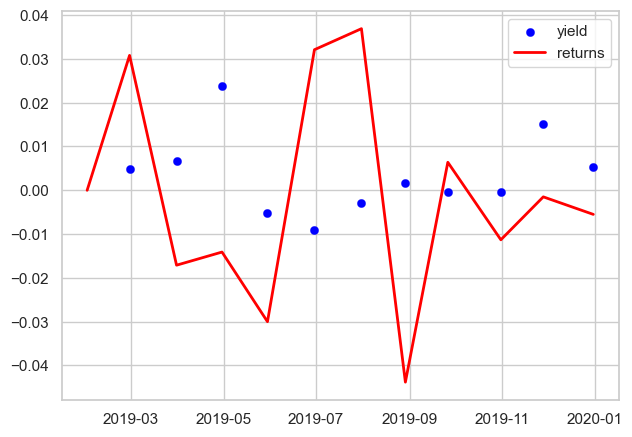

In [67]:
#fund_nums=[5106828,5520044,1144260,1143700,1146307]

fund_nums=[5106828]
data_check=merged[merged['Fund_Number'].isin(fund_nums)]

data_check=data_check.sort_values(['Report_Date'], ascending=(True))

plt.scatter(data_check['Report_Date'],data_check['yield'], label='yield', linewidth=0.2,color='blue')

plt.plot(data_check['Report_Date'],data_check['total_change'], label='returns',  linewidth=2,color='red')


plt.legend()


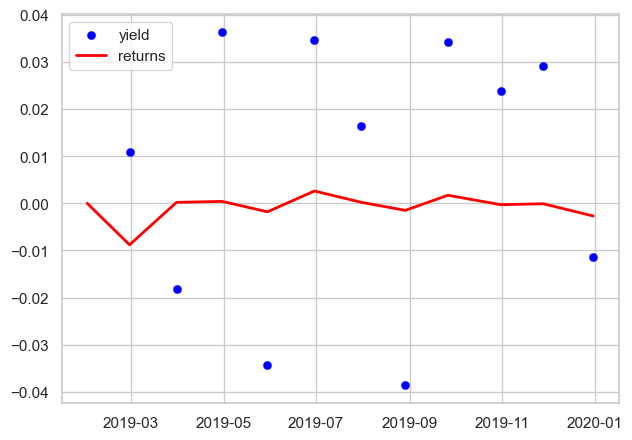

In [68]:
#fund_nums=[5106828,5520044,1144260,1143700,1146307]

fund_nums=[1143700]
data_check=merged[merged['Fund_Number'].isin(fund_nums)]

data_check=data_check.sort_values(['Report_Date'], ascending=(True))

plt.scatter(data_check['Report_Date'],data_check['yield'], label='yield', linewidth=0.2,color='blue')

plt.plot(data_check['Report_Date'],data_check['total_change'], label='returns',  linewidth=2,color='red')

plt.legend()

In [69]:
Data.describe()

,Mannager_Number,Fund_Number,Identity_Num,Identity_Num_Type,Amount,Value,Price,Currency_Value,Precent_From_Fund,Price_Type,Country_of_trade,Trading_Market,Currency,Currency_Rate,Redemption_Amount,Accumalted_Intrest,Num_of_record_in_form,Num_of_records
count,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06,3.311487e+06
mean,5.123992e+08,4.406393e+06,1.150334e+02,8.643238e-01,1.657089e+06,4.179574e+06,2.749632e+04,1.408100e+06,2.276428e+00,8.305631e-01,2.145655e+00,6.396558e-01,1.252957e+00,1.245609e+00,2.245731e+03,1.303275e+02,1.259101e+04,2.518102e+04
std,1.251760e+06,1.523356e+06,1.353421e+02,1.360051e+00,2.119117e+07,4.412637e+07,3.666796e+05,2.030554e+07,1.322806e+01,1.132917e+00,1.086959e+01,5.803808e-01,1.507604e+00,8.463511e-01,2.244616e+05,7.749732e+03,1.058883e+04,1.333601e+04
min,5.107910e+08,1.142538e+06,1.000000e+00,0.000000e+00,-9.043432e+08,-1.230493e+09,0.000000e+00,-9.043432e+08,-2.136730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.666100e+04,-4.443331e+06,1.000000e+00,1.857000e+03
25%,5.113037e+08,5.104427e+06,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.767000e+03,1.284100e+04
50%,5.119447e+08,5.115779e+06,1.000000e+01,1.000000e+00,6.738830e+03,9.508300e+04,9.827000e+01,0.000000e+00,1.200000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.391000e+03,2.848000e+04
75%,5.135350e+08,5.123187e+06,3.000000e+02,1.000000e+00,3.000000e+05,7.854080e+05,1.114100e+02,2.390852e+05,7.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.012400e+04,3.760100e+04
max,5.154310e+08,5.520044e+06,4.010000e+02,2.140000e+02,2.511387e+09,6.437976e+09,6.763426e+06,2.845101e+09,1.473430e+03,9.000000e+00,9.900000e+01,3.000000e+00,9.900000e+01,4.848400e+00,1.771816e+08,2.041866e+06,4.348000e+04,4.348000e+04


In [70]:
Data.corr()

,Mannager_Number,Fund_Number,Identity_Num,Identity_Num_Type,Amount,Value,Price,Currency_Value,Precent_From_Fund,Price_Type,Country_of_trade,Trading_Market,Currency,Currency_Rate,Redemption_Amount,Accumalted_Intrest,Num_of_record_in_form,Num_of_records
Mannager_Number,1.000000,-0.020303,-0.064683,-0.009731,0.014847,0.010473,-0.010334,-0.005935,-0.026564,0.030510,0.002744,0.056963,-0.018188,-0.025348,0.003547,-0.005232,-0.007862,-0.012485
Fund_Number,-0.020303,1.000000,-0.219798,-0.028995,-0.012695,-0.030684,0.033582,-0.045454,-0.081183,0.038936,-0.132698,0.157111,-0.024025,-0.021449,0.001718,0.009608,-0.024346,-0.196183
Identity_Num,-0.064683,-0.219798,1.000000,-0.444963,0.032113,0.079442,-0.058350,0.004912,0.104413,-0.524488,-0.113831,-0.836258,-0.107525,-0.217516,-0.007688,-0.012543,0.021876,0.043802
Identity_Num_Type,-0.009731,-0.028995,-0.444963,1.000000,-0.010843,-0.039072,0.007964,-0.003583,0.036728,0.710626,0.640938,0.631537,0.233885,0.426149,0.001572,0.018579,-0.008853,0.011176
Amount,0.014847,-0.012695,0.032113,-0.010843,1.000000,0.023569,-0.005851,0.356589,0.013122,-0.006203,-0.000451,-0.016390,-0.007327,-0.015968,0.011352,0.008341,-0.007684,-0.000596
Value,0.010473,-0.030684,0.079442,-0.039072,0.023569,1.000000,-0.004710,0.300845,0.300075,-0.038896,-0.014573,-0.059549,-0.010909,-0.011993,0.007600,0.006983,-0.006881,0.003525
Price,-0.010334,0.033582,-0.058350,0.007964,-0.005851,-0.004710,1.000000,-0.001546,-0.008066,0.013773,-0.014123,0.046723,-0.012024,-0.021512,-0.000747,-0.001257,-0.016709,-0.016987
Currency_Value,-0.005935,-0.045454,0.004912,-0.003583,0.356589,0.300845,-0.001546,1.000000,0.122741,0.002620,0.006506,-0.001112,0.004176,-0.012190,0.011645,0.009288,-0.007013,0.006859
Precent_From_Fund,-0.026564,-0.081183,0.104413,0.036728,0.013122,0.300075,-0.008066,0.122741,1.000000,0.017617,0.089961,-0.028599,0.020487,0.024933,0.001278,0.001935,0.014355,0.020545
Price_Type,0.030510,0.038936,-0.524488,0.710626,-0.006203,-0.038896,0.013773,0.002620,0.017617,1.000000,0.633892,0.759117,0.200211,0.424311,0.031129,0.034229,-0.015543,0.003657


חישוב מדד תחלופת נכסים לפי הצעה של רון

In [71]:
funds_assets=pd.DataFrame(Data[['Report_Date','Fund_Number','Fund_Name','Fund_Type','Identity_Num','Security_Num', 'Asset_name','Precent_From_Fund']])
funds_assets=funds_assets.loc[funds_assets['Identity_Num']<105]
funds_assets["Report_Date"] = pd.to_datetime(funds_assets["Report_Date"])
funds_assets=funds_assets.sort_values(['Fund_Number','Security_Num','Report_Date'], ascending=(True,True,True))
funds_assets=funds_assets.reset_index(drop = True)
funds_assets.head(220)

newdf = funds_assets.drop_duplicates(
  subset = ['Report_Date', 'Fund_Number','Security_Num'],
  keep = 'last').reset_index(drop = True)


In [72]:
datd_new

,Report_Date,Fund_Number,Fund_Name,Fund_Type,Identity_Num,Security_Num,Asset_name,Precent_From_Fund,change_keren,match_stock,match_date,check,culc
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.37,NaN,False,False,NaN,NaN
1,2019-01-31,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,0.92,0.0,True,True,NaN,NaN
2,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,2.17,0.0,True,False,True,0.0125
3,2019-02-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,1.59,0.0,True,True,NaN,NaN
4,2019-03-28,1142538,איביאי (Tech Fund (5D ...,קרן טכנולוגיה עילית - קרן סגורה,100,,פיקדון בבנק מסוים ...,-0.40,0.0,True,False,True,-0.0199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073395,2019-07-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.26,0.0,True,False,True,-0.0013
2073396,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.49,0.0,True,False,True,0.0023
2073397,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.50,0.0,True,False,True,0.0001
2073398,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,פתוחה רגילה,1,US98426T1060,YY INC-ADR ...,1.41,0.0,True,False,True,-0.0009


נבדוק לכל חודש מספר ניירות ונסכום את סך השינויים (שינוי במספר הניירות שמחזיקים יהווה בהכרח שינוי בניירות משום שהנתונים מציגים לנו רק משתנה אחד בעבור כל נייר) ביחס לממוצע ניירות של הקרן  

In [73]:
datd_new
datd_new=datd_new.groupby(['Fund_Number','Report_Date','Fund_Name'])['Security_Num'].count().reset_index(name='total_niyar')
datd_new

,Fund_Number,Report_Date,Fund_Name,total_niyar
0,1142538,2019-01-31,איביאי (Tech Fund (5D ...,32
1,1142538,2019-02-28,איביאי (Tech Fund (5D ...,32
2,1142538,2019-03-28,איביאי (Tech Fund (5D ...,33
3,1142538,2019-04-30,איביאי (Tech Fund (5D ...,33
4,1142538,2019-05-30,איביאי (Tech Fund (5D ...,33
...,...,...,...,...
25103,5520044,2019-08-29,מיטב סקיי (4D) השקעות ...,125
25104,5520044,2019-09-26,מיטב סקיי (4D) השקעות ...,133
25105,5520044,2019-10-31,מיטב סקיי (4D) השקעות ...,139
25106,5520044,2019-11-27,מיטב סקיי (4D) השקעות ...,140


מספר הקרנות בדאטה שלנו

In [74]:
len(datd_new['Fund_Number'].unique())

2272

נחשב ממוצע של מספר נכסים כולל לכל קרן ל12 חודשים 

In [75]:
datd_new.sort_values(['Fund_Number','Report_Date'], ascending=(True,True))
#datd_new["change "]

,Fund_Number,Report_Date,Fund_Name,total_niyar
0,1142538,2019-01-31,איביאי (Tech Fund (5D ...,32
1,1142538,2019-02-28,איביאי (Tech Fund (5D ...,32
2,1142538,2019-03-28,איביאי (Tech Fund (5D ...,33
3,1142538,2019-04-30,איביאי (Tech Fund (5D ...,33
4,1142538,2019-05-30,איביאי (Tech Fund (5D ...,33
...,...,...,...,...
25103,5520044,2019-08-29,מיטב סקיי (4D) השקעות ...,125
25104,5520044,2019-09-26,מיטב סקיי (4D) השקעות ...,133
25105,5520044,2019-10-31,מיטב סקיי (4D) השקעות ...,139
25106,5520044,2019-11-27,מיטב סקיי (4D) השקעות ...,140


In [76]:
average=datd_new.groupby(['Fund_Number'])['total_niyar'].mean().reset_index(name='average assets amount')
datd_new = pd.merge(datd_new,average, on =['Fund_Number'] , how ="inner")

In [77]:
datd_new

,Fund_Number,Report_Date,Fund_Name,total_niyar,average assets amount
0,1142538,2019-01-31,איביאי (Tech Fund (5D ...,32,34.916667
1,1142538,2019-02-28,איביאי (Tech Fund (5D ...,32,34.916667
2,1142538,2019-03-28,איביאי (Tech Fund (5D ...,33,34.916667
3,1142538,2019-04-30,איביאי (Tech Fund (5D ...,33,34.916667
4,1142538,2019-05-30,איביאי (Tech Fund (5D ...,33,34.916667
...,...,...,...,...,...
25103,5520044,2019-08-29,מיטב סקיי (4D) השקעות ...,125,124.166667
25104,5520044,2019-09-26,מיטב סקיי (4D) השקעות ...,133,124.166667
25105,5520044,2019-10-31,מיטב סקיי (4D) השקעות ...,139,124.166667
25106,5520044,2019-11-27,מיטב סקיי (4D) השקעות ...,140,124.166667


In [78]:
datd_new['change in assets Yes/No']= datd_new['total_niyar'].diff()
datd_new['change keren']=datd_new['Fund_Number'].diff()
datd_new.loc[datd_new['change keren'] != 0,'change keren'] = 1
datd_new.loc[datd_new['change keren'] ==  1,'change in assets Yes/No'] = np.nan

datd_new.loc[datd_new['change in assets Yes/No']>0,'change in assets Yes/No'] = 1
datd_new.loc[datd_new['change in assets Yes/No']<0,'change in assets Yes/No'] = 1

datd_new

,Fund_Number,Report_Date,Fund_Name,total_niyar,average assets amount,change in assets Yes/No,change keren
0,1142538,2019-01-31,איביאי (Tech Fund (5D ...,32,34.916667,NaN,1.0
1,1142538,2019-02-28,איביאי (Tech Fund (5D ...,32,34.916667,0.0,0.0
2,1142538,2019-03-28,איביאי (Tech Fund (5D ...,33,34.916667,1.0,0.0
3,1142538,2019-04-30,איביאי (Tech Fund (5D ...,33,34.916667,0.0,0.0
4,1142538,2019-05-30,איביאי (Tech Fund (5D ...,33,34.916667,0.0,0.0
...,...,...,...,...,...,...,...
25103,5520044,2019-08-29,מיטב סקיי (4D) השקעות ...,125,124.166667,1.0,0.0
25104,5520044,2019-09-26,מיטב סקיי (4D) השקעות ...,133,124.166667,1.0,0.0
25105,5520044,2019-10-31,מיטב סקיי (4D) השקעות ...,139,124.166667,1.0,0.0
25106,5520044,2019-11-27,מיטב סקיי (4D) השקעות ...,140,124.166667,1.0,0.0


In [79]:
changes=datd_new.groupby(['Fund_Number'])['change in assets Yes/No'].sum().reset_index(name='total changes')
changes

,Fund_Number,total changes
0,1142538,6.0
1,1143700,10.0
2,1143718,11.0
3,1143726,2.0
4,1143734,12.0
...,...,...
2267,5231030,11.0
2268,5231055,11.0
2269,5231097,7.0
2270,5520028,9.0


In [80]:
datd_new = pd.merge(datd_new,changes, on =['Fund_Number'] , how ="inner")
precent_change=datd_new[['Fund_Number','Fund_Name','average assets amount','total changes']]
newdf = precent_change.drop_duplicates(
  subset = ['Fund_Number'],
  keep = 'last').reset_index(drop = True)
newdf

,Fund_Number,Fund_Name,average assets amount,total changes
0,1142538,איביאי (Tech Fund (5D ...,34.916667,6.0
1,1143700,תכלית סל (40) תא 35 ...,55.500000,10.0
2,1143718,תכלית סל(40) תא 125 ...,152.000000,11.0
3,1143726,תכלית סל(40 תא בנקים 5 ...,11.083333,2.0
4,1143734,תכלית סל ממ NAS100 4A ...,30.076923,12.0
...,...,...,...,...
2267,5231030,הר שקלית פלוס ...,126.833333,11.0
2268,5231055,הר נבחרת אגח ! ...,109.250000,11.0
2269,5231097,הר כספית דולרית ...,19.166667,7.0
2270,5520028,מיטב דש (0B)(!) קונצר ללא ...,223.000000,9.0


In [81]:
newdf['change weight']=newdf['total changes']/newdf['average assets amount']
newdf

,Fund_Number,Fund_Name,average assets amount,total changes,change weight
0,1142538,איביאי (Tech Fund (5D ...,34.916667,6.0,0.171838
1,1143700,תכלית סל (40) תא 35 ...,55.500000,10.0,0.180180
2,1143718,תכלית סל(40) תא 125 ...,152.000000,11.0,0.072368
3,1143726,תכלית סל(40 תא בנקים 5 ...,11.083333,2.0,0.180451
4,1143734,תכלית סל ממ NAS100 4A ...,30.076923,12.0,0.398977
...,...,...,...,...,...
2267,5231030,הר שקלית פלוס ...,126.833333,11.0,0.086728
2268,5231055,הר נבחרת אגח ! ...,109.250000,11.0,0.100686
2269,5231097,הר כספית דולרית ...,19.166667,7.0,0.365217
2270,5520028,מיטב דש (0B)(!) קונצר ללא ...,223.000000,9.0,0.040359


In [82]:
year_data=pd.concat([Data1,Data12], axis=0)
year_data["Report_Date"] = pd.to_datetime(year_data["Report_Date"])

year_data = year_data.reset_index(drop = True)  

year_data=year_data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value']]



groups=[300,301]


year_data=year_data[year_data['Identity_Num'].isin(groups)]

year_data=year_data.sort_values(['Fund_Number','Report_Date','Identity_Num'], ascending=(True,True,True))

year_data = year_data.reset_index(drop = True)  



year_data['Value'] = year_data.Value.shift(1)
year_data.reset_index(drop = True)



year_data = year_data[year_data.Amount != 0]

year_data=year_data.drop('Identity_Num',axis=1)

year_data = year_data.reset_index(drop = True)
year_data

year_data['Price_YECHIDA']=year_data.Value/year_data.Amount
year_data['yield']=year_data['Price_YECHIDA'].pct_change()


year_data['change']=year_data['Fund_Number'].diff()
year_data.loc[year_data['change'] != 0, 'yield'] = np.nan


#year_data=year_data.drop('change',axis=1)
#year_data=year_data.loc[year_data['change'] == 0]

year_data=year_data.loc[year_data['yield'].isnull()!=True]

year_data.reset_index(drop = True)


,Report_Date,Fund_Number,Fund_Name,Amount,Value,Price_YECHIDA,yield,change
0,2019-12-31,1142538,איביאי (Tech Fund (5D ...,4.031446e+08,4.419142e+08,1.096168,0.103395,0.0
1,2019-12-31,1143700,תכלית סל (40) תא 35 ...,7.935932e+07,1.329894e+09,16.757880,0.081812,0.0
2,2019-12-31,1143718,תכלית סל(40) תא 125 ...,1.843196e+08,2.959941e+09,16.058746,0.142674,0.0
3,2019-12-31,1143726,תכלית סל(40 תא בנקים 5 ...,8.007727e+07,1.948767e+09,24.336086,0.186070,0.0
4,2019-12-31,1143734,תכלית סל ממ NAS100 4A ...,1.050184e+07,8.532920e+08,81.251651,0.239883,0.0
...,...,...,...,...,...,...,...,...
1929,2019-12-31,5231030,הר שקלית פלוס ...,5.774672e+05,3.948728e+07,68.380123,0.069450,0.0
1930,2019-12-31,5231055,הר נבחרת אגח ! ...,5.776325e+06,7.588266e+07,13.136842,0.050228,0.0
1931,2019-12-31,5231097,הר כספית דולרית ...,1.152698e+06,3.514579e+07,30.490013,-0.033209,0.0
1932,2019-12-31,5520028,מיטב דש (0B)(!) קונצר ללא ...,1.310368e+08,7.170106e+08,5.471827,0.047542,0.0


In [83]:
year_yield=year_data[['Fund_Number','yield']]
year_yield

,Fund_Number,yield
1,1142538,0.103395
3,1143700,0.081812
5,1143718,0.142674
7,1143726,0.186070
9,1143734,0.239883
...,...,...
4198,5231030,0.069450
4200,5231055,0.050228
4202,5231097,-0.033209
4204,5520028,0.047542


In [84]:
newdf

,Fund_Number,Fund_Name,average assets amount,total changes,change weight
0,1142538,איביאי (Tech Fund (5D ...,34.916667,6.0,0.171838
1,1143700,תכלית סל (40) תא 35 ...,55.500000,10.0,0.180180
2,1143718,תכלית סל(40) תא 125 ...,152.000000,11.0,0.072368
3,1143726,תכלית סל(40 תא בנקים 5 ...,11.083333,2.0,0.180451
4,1143734,תכלית סל ממ NAS100 4A ...,30.076923,12.0,0.398977
...,...,...,...,...,...
2267,5231030,הר שקלית פלוס ...,126.833333,11.0,0.086728
2268,5231055,הר נבחרת אגח ! ...,109.250000,11.0,0.100686
2269,5231097,הר כספית דולרית ...,19.166667,7.0,0.365217
2270,5520028,מיטב דש (0B)(!) קונצר ללא ...,223.000000,9.0,0.040359


In [85]:
data = pd.merge(newdf,year_yield, on =['Fund_Number'] , how ="inner")


In [86]:
data

,Fund_Number,Fund_Name,average assets amount,total changes,change weight,yield
0,1142538,איביאי (Tech Fund (5D ...,34.916667,6.0,0.171838,0.103395
1,1143700,תכלית סל (40) תא 35 ...,55.500000,10.0,0.180180,0.081812
2,1143718,תכלית סל(40) תא 125 ...,152.000000,11.0,0.072368,0.142674
3,1143726,תכלית סל(40 תא בנקים 5 ...,11.083333,2.0,0.180451,0.186070
4,1143734,תכלית סל ממ NAS100 4A ...,30.076923,12.0,0.398977,0.239883
...,...,...,...,...,...,...
1929,5231030,הר שקלית פלוס ...,126.833333,11.0,0.086728,0.069450
1930,5231055,הר נבחרת אגח ! ...,109.250000,11.0,0.100686,0.050228
1931,5231097,הר כספית דולרית ...,19.166667,7.0,0.365217,-0.033209
1932,5520028,מיטב דש (0B)(!) קונצר ללא ...,223.000000,9.0,0.040359,0.047542


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='change weight', ylabel='yield'>

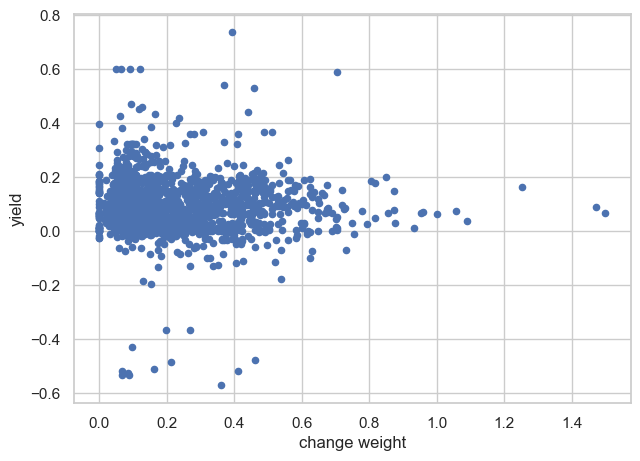

In [87]:
df=data[['change weight','yield']]
df
df.plot( 'change weight' , 'yield',kind="scatter")